In [191]:
from platform import python_version

print(python_version())

3.6.5


In [211]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.datasets import load_wine

import scipy
from scipy import stats

import seaborn as sns

In [193]:
scipy.__version__, sns.__version__

('1.1.0', '0.11.0')

 - `scipy`: https://docs.scipy.org/doc/scipy-0.14.0/reference/index.html
 - moduł `scipy.stats`: *This module contains a large number of probability distributions as well as a growing library of statistical functions.*
 - `seaborn`: *Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.*

# Statystyka opisowa

## Rodzaje danych, skale pomiarowe:

 - **dane jakościowe**: **nominalne** (nie posiadające sensownego uporządkowania np. oznaczające płeć albo kolor oczu) i **porządkowe** (możliwe do uporządkowania i porównywania np. niski/średniego wzrostu/wysoki, ale nie można na tych danych wykonywać działań np. bez sensu jest takie działanie: wysoki - średni $\neq$ niski)
 
 
 - **dane ilościowe** (np. temperatura, długość, czas trwania) 

## Statystyki próbkowe

### Miary tendencji centralnej

Mamy $n$ obserwacji $x_1, x_2, \ldots, x_n$ (np. długość życia podaną w latach).

**Średnia** (a dokładniej średnia arytmetyczna: liczymy sumę wszystkich obserwacji i dzielimy przez ich liczbę):
$$\overline{x} = \sum \limits_{i=1}^n x_i = \frac{1}{n}\left(x_1 + x_2 + \ldots + x_n\right).$$

**Mediana** to wartość środkowa lub inaczej wartość przeciętna (sortujemy dane w kolejności od najmniejszej do największej i w przypadku nieparzystej liczby obserwacji wybieramy środkową, zaś jeśli liczba obserwacji jest parzysta liczymy średnią z dwóch środkowych obserwacji):
$$\textrm{Mediana} = \left\{\begin{array}{ll} x_{\left(k+1\right)} & \textrm{ gdy } n = 2k+1 \\
\frac{x_{\left(k\right)} + x_{\left(k+1\right)}}{2} & \textrm{ gdy } n  = 2k \end{array}\right..$$

_Oznaczenie $x_{(k)}$:_

Dla danego ciągu $x_1, x_2, \ldots, x_n$ określamy ciąg $x_{(1)}, x_{(2)}, \ldots, x_{(n)}$ który powstaje przez jego niemalejące uporządkowanie, tzn.
$$x_{(1)} \leq x_{(2)} \leq \ldots \leq x_{(n)},$$
czyli $x_{(k)}$ oznacza $k$-tą najmniejszą liczbę 
(szczególne przypadki: $x_{(1)}$ to najmniejsza liczba, $x_{(n)}$ to największa liczba, gdy $n$ jest nieparzyste $x_{((n+1)/2)}$ jest środkową liczbą pod względem wartości, zaś gdy $n$ jest parzyste mamy dwie liczby w środku - $x_{(n/2)}$ i $x_{(n/2 + 1)}$).

**Dominanta** to najczęściej występująca w danych wartość.

### Przykłady 

 - (średnia-mediana) 
 
 *Prawie każdy człowiek ma liczbę nóg powyżej średniej.*
 
 W przypadku niektórych danych trzeba bardzo ostrożnie podchodzić do liczenia i interpretowania średniej. Niekiedy lepiej posłużyć się medianą.
 
 
 - (średnia-mediana) 
 
 W przypadku danych skośnych (tzn. np. rozkład zarobków) średnia niekoniecznie dobrze oddaje ,,środek'' danych. Większość obserwaji jest mniejsza od średniej.
 
 *Średnia płaca w Polsce w podmiotach zatrudniających powyżej 9 osób wynosi 5213,27 zł brutto, zaś mediana 4337,85 zł brutto*.
 
 
 - (średnia-mediana)
 
 Średnia nie jest odporna na outliery (obserwacje odstające) i, podobnie jak w przykładzie powyżej, może niekoniecznie dobrze oddawać ,,przeciętną'' wartość.
 
 *Firma zatrudnia 10 pracowników i płaci im po 5000 zł. W firmie pracuje też prezes, który zarabia 10000 zł. Średnia zarobków w tej firmie wynosi 60000/11 $\approx$ 5455 zł, zaś mediana 5000 zł*.
 
 
 - (mediana-dominanta)
 
 Nie zawsze średnią można policzyć. Np. dla danych typu mały/średni/duży możemy podać medianę i dominantę, a dla danych klon/dąb/lipa jedynie dominantę.


#### Przykład

Mamy $n = 11$ posortowanych obserwacji dotyczących wzrostu. średnią liczymy dodając wszystkie liczby do siebie i dzieląc przez 11. Środkową (szóstą z kolei) obserwacją jest $173$, dlatego mediana wynosi $173$.

In [194]:
wzrost = [156, 160, 167, 167, 170, 173, 174, 185, 187, 188, 198]

# średnia 

sum(wzrost)/11, np.mean(wzrost), scipy.mean(wzrost)

(175.0, 175.0, 175.0)

In [195]:
# mediana

np.sort(wzrost)[int((11 + 1)/2 - 1)], np.median(wzrost), scipy.median(wzrost)

(173, 173.0, 173.0)

In [196]:
# dominanta (moda)
# uwaga: na zmiennych ciągłych, szczególnie, gdy obserwacji jest mało i się prawie nie powtarzają, 
# podawanie mody może być mylące

scipy.stats.mode(wzrost)
#scipy.stats.mode(wzrost).mode

ModeResult(mode=array([167]), count=array([2]))

#### Zadanie (statystyki dla danych zgrupowanych)

Dla następujących danych policzyć średnią, medianę i dominantę.

**Struktura rodzin posiadających dzieci w wieku 0-24 lata na utrzymaniu w 2011 roku**

 - 53,5% - jedno dziecko
 - 35,1% - dwoje dzieci
 - 8,5% - troje dzieci
 - 2,9% - czworo i więcej
 
*Podpowiedź: W przypadku kategorii ,,czworo i więcej'' można przyjąć, że liczba dzieci wynosi dokładnie 4.*

In [212]:
# średnia

(53.5*1 + 35.1*2 + 8.5*3 + 2.9*4)/100

1.6079999999999999

In [213]:
# mediana = 1
# dominanta = 1

### Kwantyle

Kwantyl rzędu $q$ jest taką liczbą $x_q$, że $q \cdot 100\%$ populacji ma wartość zmiennej nie większą niż $x_q$.

**Przykład** W populacji badanej ze względu na wiek kwantyl rzędu $0.7$ wynosi 50 lat ($x_{0.7} = 50$), czyli $70\%$ osób ma nie więcej niż 50 lat.


Szczególne kwantyle:

 - **mediana** - kwantyl rzędu 0.5
 
 - **kwartyle** - kwantyle rzędu 0.25, 0.5, 0.75
 
 - **decyle** - kwantyle rzędu 0.1, 0.2, ..., 0.9
 
 - **percentyle/centyle** - kwantyle rzędu 0.01, 0.02, ..., 0.99
 
W statystyce ważne są kwantyle rzędu $q_{0.05}$ i $q_{0.95}$ wyznaczające odpowiednio 5% najmniejszych i 5% największych obserwacji oraz $q_{0.025}$ i $q_{0.975}$ wyznaczających łącznie 5% najbardziej odstających obserwacji z góry i z dołu.

#### Zadanie (kwantyle + rozkład skośny)

Wyznacz średnią i medianę zarobków. Następnie policz średnią i medianę zarobków po odrzuceniu 5% największych obserwacji i porównaj z poprzednio wyznaczonymi wartościami. Jakie można wyciągnąć wnioski?

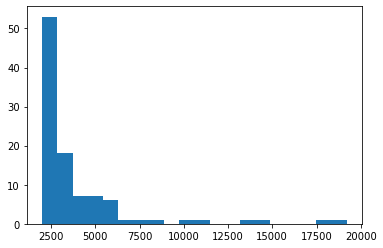

In [197]:
zarobki = [2544, 2066, 5774, 2072, 3146, 3260, 2066, 7040, 2006, 2912, 2006, 2762, 2006, 5510, 3620, 4256, 5690, 2006, 2660, 3404, 2012, 3968, 2606, 4256, 2468, 13490, 2744, 3176, 3542, 2210, 2000, 5912, 2000, 5924, 4154, 2006, 2066, 2486, 2060, 5186, 2030, 2504, 2294, 2876, 4754, 2378, 2738, 4652, 2108, 2030, 3722, 2006, 2042, 4640, 2288, 3716, 2468, 7574, 3992, 3470, 2432, 2000, 2924, 4508, 2000, 19196, 2090, 2948, 2864, 5192, 11090, 2192, 3422, 2198, 14876, 2048, 2612, 3098, 4628, 2108, 2366, 17948, 2706, 2600, 3098, 4682, 2000, 8870, 9866, 2096, 3254, 2500, 5780, 2066, 2090, 2500, 2204, 2000, 2120, 3122]
plt.hist(zarobki, bins=20)
plt.show()

In [ ]:
# tak: np.quantile([], 0.5)
# albo tak: scipy.quantile()

In [214]:
np.mean(zarobki), np.median(zarobki)

(3836.48, 2722.0)

In [216]:
min5 = np.quantile(zarobki, 0.05)
max5 = np.quantile(zarobki, 0.95)
print(min5, max5)
zarobki2 = [e for e in zarobki if e<max5]
#zarobki2
np.mean(zarobki2), np.median(zarobki2)

2000.0 9927.199999999997


(3232.084210526316, 2612.0)

In [219]:
zarobki3 = np.array(zarobki)[zarobki < max5]
np.mean(zarobki3), np.median(zarobki3)

(3232.084210526316, 2612.0)

In [220]:
zarobki < max5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Miary rozrzutu

**rozstęp** - maksymalna wartość obserwacji minus minimalna wartość obserwacji

**odchylenie standardowe** - jest pierwiastkiem ze średniej kwadratów odchyleń obserwacji od średniej:
$$s = \sqrt{\frac{1}{n}\sum \limits_{i=1}^{n}(x_i - \overline{x})^2} = \sqrt{\frac{1}{n} \sum \limits_{i=1}^{n} x_i^2 - \overline{x}^2}$$

**wariancja** $s^2 = \frac{1}{n}\sum \limits_{i=1}^{n}(x_i - \overline{x})^2$

*Ze względu na lepsze własności statystyczne często używa się $\frac{1}{n-1}$ zamiast $\frac{1}{n}$
$$
s^{2}= \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar x)^2
$$*

In [198]:
wzrost = np.array([156, 160, 167, 167, 170, 173, 174, 185, 187, 188, 198])

# rozstęp
(np.max(wzrost) - np.min(wzrost))

# odchylenie standardowe
np.sqrt(np.mean((wzrost - np.mean(wzrost))**2)), np.sqrt(np.mean(wzrost**2) - np.mean(wzrost)**2), np.std(wzrost)

(12.380336315008865, 12.380336315008892, 12.380336315008865)

### Korelacja Pearsona

Współczynnik korelacji Pearsona określa poziom zależności liniowej między zmiennymi.

$$r_{xy} = \frac{\sum_{i} (x_i - \bar x)(y_i - \bar y)}{\sqrt{\sum_{i} (x_i - \bar x)^2}\sqrt{\sum_{i} (y_i - \bar y)^2}}$$

Współczynnik spełnia $r_{xy} \in [-1, 1]$. Im większa jego wartość bezwzględna, tym silniejsza zależność pomiędzy zmiennymi.

#### Dodatnia/ujemna korelacja

Dodatnia korelacja występuje wtedy, gdy obie zmienne zmieniają się w taki sam sposób, tzn. gdy $x$ rośnie, to $y$ też rośnie, a gdy $x$ spada, to $y$ też. Ujemna korelacja oznacza, że gdy $x$ rośnie to $y$ spada i na odwrót.

W poniższym przykładzie mamy zależności $Y \approx X$ i $Y \approx -X$.

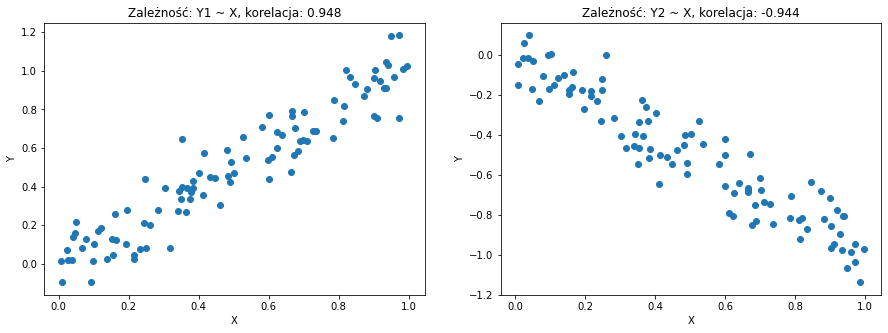

In [199]:
X = np.random.uniform(0, 1, 100)
Y1 = X + np.random.normal(0, 0.1, 100)
Y2 = -X + np.random.normal(0, 0.1, 100)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(X, Y1, "o")
axs[0].set_title('Zależność: Y1 ~ X, korelacja: ' + str(np.round(scipy.stats.pearsonr(X, Y1)[0], 3)))
axs[1].plot(X, Y2, "o")
axs[1].set_title('Zależność: Y2 ~ X, korelacja: ' + str(np.round(scipy.stats.pearsonr(X, Y2)[0], 3)))

for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Y')

plt.show()

**Uwagi**

 - Y1 - "porządna" zależność liniowa
 - Y2 - zależność liniowa, ale punkty są bardziej rozproszone i to wpłynęło na wartość $r_{xy}$
 - przy Y3 zależność jest taka sama jak w Y1, ale występuje jeden outlier - $r_{xy}$ bardzo spadło, bo jest wrażliwe na outliery
 - Y4 - zależność jestkwadratowa, a mimo to $r_{xy}$ jest duże
 - Y5 - występuje wyraźna zależność (zdecydowanie nieliniowa), której $r_{xy}$ nie wykrywa
 - Y6 - niezależne zmienne, a korelacja podobna do Y5, gdzie jest zależność

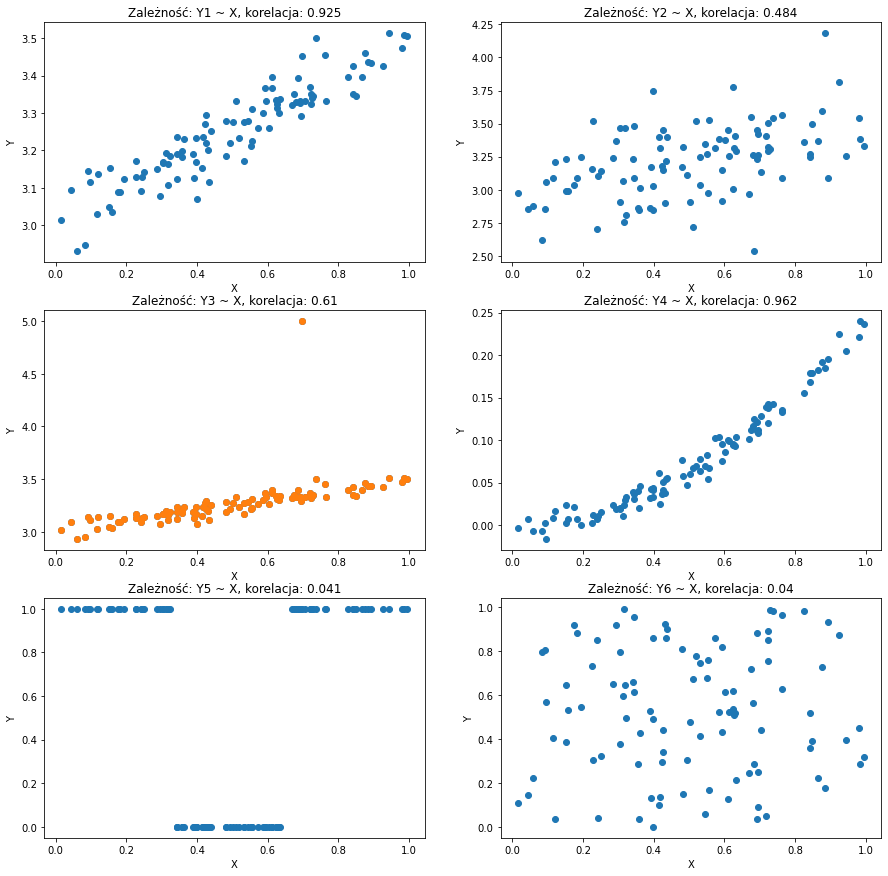

In [200]:
np.random.seed(123)

X = np.random.uniform(0, 1, 100)
Y1 = 3 + X/2 + np.random.normal(0, 0.05, 100)
Y2 = 3 + X/2 + np.random.normal(0, 0.25, 100)
Y3 = np.copy(Y1)
Y3[0] = 5
Y4 = (X/2)**2 + np.random.normal(0, 0.01, 100)
Y5 = (X < 1/3) + (X > 2/3) + 0.0
Y6 = np.random.uniform(0, 1, 100)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
axs[0, 0].plot(X, Y1, "o")
axs[0, 0].set_title('Zależność: Y1 ~ X, korelacja: ' + str(np.round(scipy.stats.pearsonr(X, Y1)[0], 3)))
axs[0, 1].plot(X, Y2, "o")
axs[0, 1].set_title('Zależność: Y2 ~ X, korelacja: ' + str(np.round(scipy.stats.pearsonr(X, Y2)[0], 3)))
axs[1, 0].plot(X, Y3, "o")
axs[1, 0].set_title('Zależność: Y3 ~ X, korelacja: ' + str(np.round(scipy.stats.pearsonr(X, Y3)[0], 3)))
axs[1, 0].plot(X, Y3, "o")
axs[1, 0].set_title('Zależność: Y3 ~ X, korelacja: ' + str(np.round(scipy.stats.pearsonr(X, Y3)[0], 3)))
axs[1, 1].plot(X, Y4, "o")
axs[1, 1].set_title('Zależność: Y4 ~ X, korelacja: ' + str(np.round(scipy.stats.pearsonr(X, Y4)[0], 3)))
axs[2, 0].plot(X, Y5, "o")
axs[2, 0].set_title('Zależność: Y5 ~ X, korelacja: ' + str(np.round(scipy.stats.pearsonr(X, Y5)[0], 3)))
axs[2, 1].plot(X, Y6, "o")
axs[2, 1].set_title('Zależność: Y6 ~ X, korelacja: ' + str(np.round(scipy.stats.pearsonr(X, Y6)[0], 3)))

for ax in axs.flat:
    ax.set(xlabel='X', ylabel='Y')

# for ax in axs.flat:
#    ax.label_outer()

#### Zadanie (porównanie modeli na podstawie statystyk)
W ramce danych `predykcje_modele.csv` znajdują się wartości zmiennej odpowiedzi (cena nieruchomości w tys.) i jej wartości przewidziane przez trzy modele (mod1, mod2, mod3).

 - Znajdź model, którego predykcje najmniej odpowiadają rzeczywistym wartościom cen nieruchomości (użyj korelacji Pearsona).

In [226]:
# scipy.stats.pearsonr(X, Y1)[0]
df = pd.read_csv("predykcje_modele.csv")
scipy.stats.pearsonr(df["cena"], df["mod1"])[0] # mało adekwatny

-0.01929829663732412

In [227]:
scipy.stats.pearsonr(df["cena"], df["mod2"])[0]

0.9152295630056866

In [228]:
scipy.stats.pearsonr(df["cena"], df["mod3"])[0]

0.9036790962728272

 - Dla pozostałych dwóch modeli policz błąd bezwzględny (wartość nieruchomości - predykcja). Policz średnią, medianę, kwantyle rzędu 0.1 i 0.9 i odchylenie standardowe dla błędów. Na tej podstawie oceń, który z modeli lepiej przewiduje wartości nieruchomości.

In [240]:
modele = df

modele['mod3_błąd'] = modele['cena'] - modele['mod3']
modele['mod2_błąd'] = modele['cena'] - modele['mod2']

#średnia
print(np.mean(modele['mod3_błąd']), np.mean(modele['mod2_błąd']))

#mediana
print(np.median(modele['mod3_błąd']), np.median(modele['mod2_błąd']))

#kwantyle rzędu 0.1 i 0.9
print(np.quantile(modele['mod3_błąd'], 0.1), np.quantile(modele['mod2_błąd'], 0.1), np.quantile(modele['mod3_błąd'], 0.9), np.quantile(modele['mod2_błąd'], 0.9))

#odchylenie standardowe
np.std(modele['mod3_błąd']), np.std(modele['mod2_błąd'])

# na podstawie kwantyli lepszy model 3

4.752605754153971 4.756565561973584
3.8091184428775193 4.543120641003611
-22.682871010800774 -49.718378840955914 26.99388605058778 68.9413699586096


(49.51483439250171, 48.472805055887754)

 -  Dla modeli z poprzedniego podpunktu narysuj wykresy przewidywanych wartości w zależności od ceny.

Text(0.5, 1.0, 'Mod3, korelacja: 0.904')

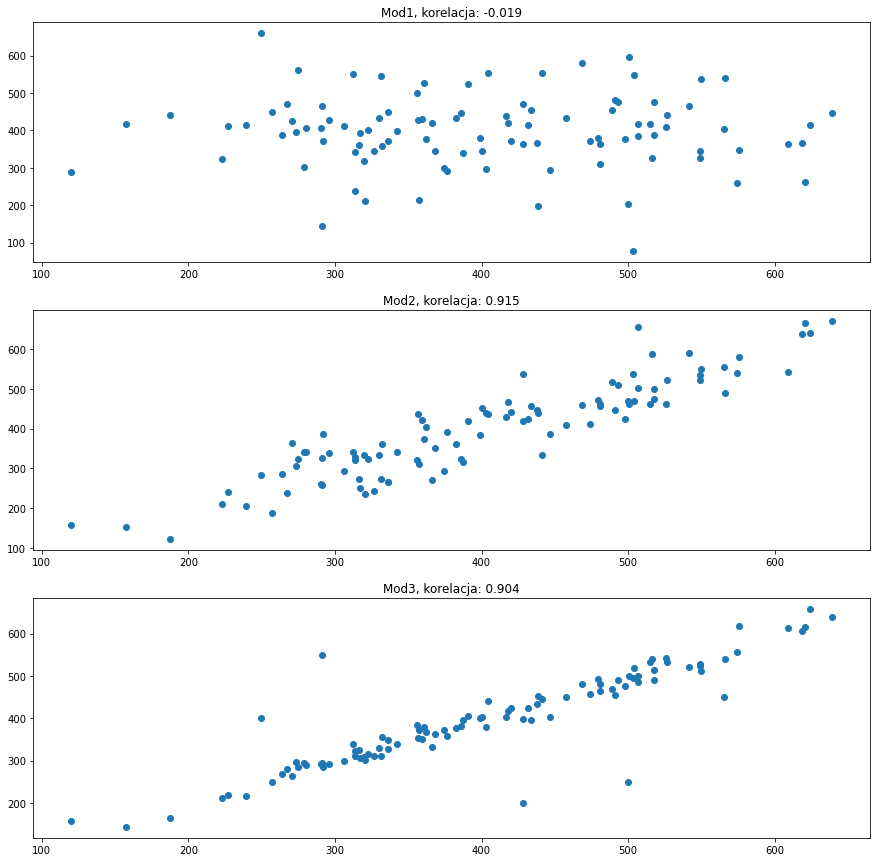

In [231]:
dane=df

fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].plot(dane.cena, dane.mod1, "o")  
axs[0].set_title('Mod1, korelacja: ' + str(np.round(scipy.stats.pearsonr(dane.cena, dane.mod1)[0], 3)))
axs[1].plot(dane.cena, dane.mod2, "o")  
axs[1].set_title('Mod2, korelacja: ' + str(np.round(scipy.stats.pearsonr(dane.cena, dane.mod2)[0], 3)))
axs[2].plot(dane.cena, dane.mod3, "o")  
axs[2].set_title('Mod3, korelacja: ' + str(np.round(scipy.stats.pearsonr(dane.cena, dane.mod3)[0], 3)))


# Wizualizacja danych

Jednym z pierwszych kroków w analizie danych jest ich wizualizacja.
Wyświetlanie danych jest pomocne w znajdowaniu elementów
ekstremalnych/odstających, które często są spowodowane błędami w
gromadzeniu danych.
Wybór odpowiedniej procedury statystycznej zależy od typu danych.
Dane mogą być:
 - kategoryczne (palacz/osoba niepaląca, żonaty/singiel/rozwiedziony)
 - liczbowe (ciągłe/dyskretne).

Polecane strony:

http://www.biecek.pl/Eseje/indexPomylka.html

https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368

http://smarterpoland.pl i tam Konkurs na najgorszy wykres roku - mnóstwo złych wykresów, dokładnie omawiane są popełnione błędy (http://smarterpoland.pl/index.php/2019/12/najgorszy-wykres-2019/)

### Wykres kołowy

Kiedy można stosować:
 - gdy chcemy przedstawić proporcje
 - gdy nie mamy zbyt dużo kategorii (w przypadku, gdy kategorii jest za dużo można część mniej licznych kategorii oznaczyć łącznie jako "inne")
 - gdy chcemy przekazać prosty komunikat (np. że jakaś grupa przeważa w populacji)
 
Dobre praktyki: warto na wykresie umieścić informację o procentach lub liczności danych grup. Warto też sprawdzić, czy po zaokrągleniu procenty nadal sumują się do 100%.

Ostrzeżenie: *Z wykresami kołowymi wiąże się wiele problemów, takich jak trudności w szacowaniu kątów czy powierzchni, które powodują, że koła, choć atrakcyjne wizualnie, są niedokładnym medium prezentacji danych.* P.Biecek

#### Przykład 

 - Czy na ostatnim wykresie grupa B ma większe udziały niż na pierwszym?
 - Czy na drugim wykresie grupa C jest dwa razy liczniejsza od A?
 

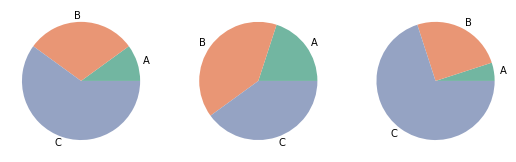

In [163]:
plt.figure(figsize=(9,9))

przyklad_piechart = pd.read_csv("przyklad_piechart.csv", index_col=0)

plt.subplot(131)
sizes = przyklad_piechart.loc[0,:].to_list()
labels = ["A", "B", "C"]
plt.pie(sizes, labels=labels)

plt.subplot(132)
sizes = przyklad_piechart.loc[1,:].to_list()
labels = ["A", "B", "C"]
plt.pie(sizes, labels=labels)

plt.subplot(133)
sizes = przyklad_piechart.loc[2,:].to_list()
labels = ["A", "B", "C"]
plt.pie(sizes, labels=labels)
plt.show()

#### Przykład

In [242]:
# ładowanie danych 
data_all = load_wine()
X = data_all.data
y = data_all.target
X_names = data_all.feature_names
y_names = data_all.target_names
df = pd.DataFrame(data=X, columns=X_names)

In [243]:
# zmienne
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [244]:
# typy win
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [245]:
df['y'] = y

In [246]:
# policzmy, ile mamy 0, 1, 2
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

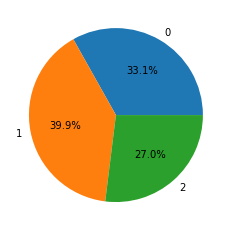

In [247]:
y_counts = np.unique(y, return_counts=True)
labels = y_counts[0].astype('str')
sizes = y_counts[1]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

### Wykres słupkowy

Kiedy stosować:

 - kiedy chcemy pokazać liczności w grupach i je porównać

Ostrzeżenie: oś y powinna zaczynać się od zera i nie powinno się tego zmieniać, by uwidocznić różnice.

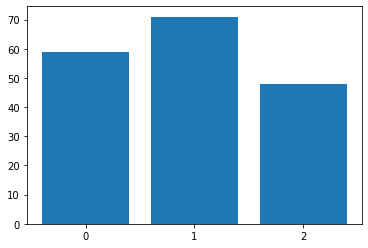

In [248]:
plt.bar(labels, height=sizes, tick_label=labels)
plt.show()

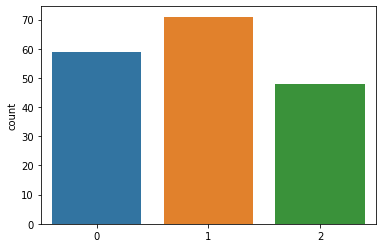

In [249]:
sns.countplot(x=y)
plt.show()

 - kiedy chcemy pokazać rozkład zmiennej

#### Histogramy

W przypadku zmiennych ciągłych można przedstawić rozkład empiryczny na histogramie. Dzielimy wtedy dane na przedziały i liczymy obserwacje, które wpadają do poszczególnych przedziałów, a następnie rysujemy wykres liczebności lub częstości.

Liczbę przedziałów (parametr `bins`) można wybrać samodzielnie lub skorzystać z którejś z dostępnych metod (w `matplotlib` mamy: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'.)

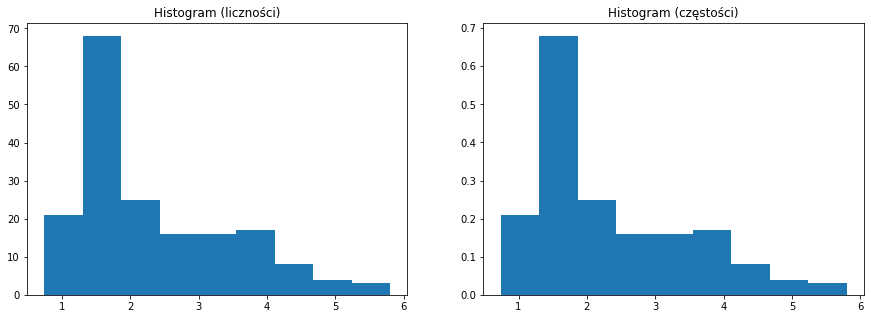

In [252]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(df["malic_acid"], bins='sturges')
axs[0].set_title('Histogram (liczności)')
axs[1].hist(df["malic_acid"], density=True, bins='sturges')
axs[1].set_title('Histogram (częstości)')
plt.show()

**Porównanie rozkładów empirycznych**

Histogram

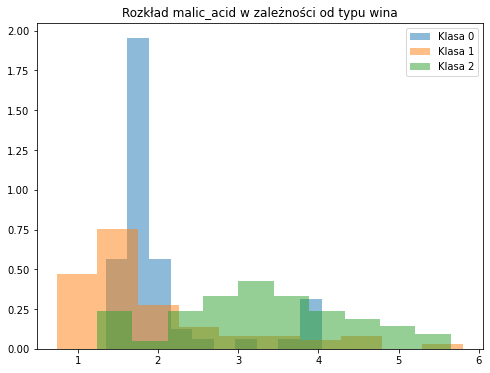

In [106]:
plt.figure(figsize=(8,6))
plt.hist(np.array(df["malic_acid"])[y == 0], alpha=0.5, label="Klasa 0", density=True)
plt.hist(np.array(df["malic_acid"])[y == 1], alpha=0.5, label="Klasa 1", density=True)
plt.hist(np.array(df["malic_acid"])[y == 2], alpha=0.5, label="Klasa 2", density=True)
plt.legend()
plt.title("Rozkład malic_acid w zależności od typu wina")
plt.show()

Wygładzony histogram (metoda kde - kernel density estimation)

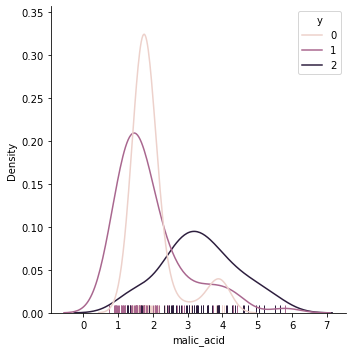

In [107]:
sns.displot(hue="y", x="malic_acid", data=df, kind='kde', legend=False)
sns.rugplot(hue="y", x="malic_acid", data=df) # rysuje, gdzie dokładnie są obserwacje (przy osi x)
plt.show()

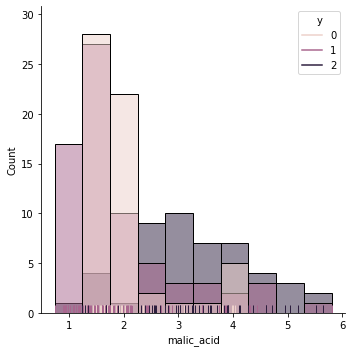

In [253]:
sns.displot(hue="y", x="malic_acid", data=df, legend=False)
sns.rugplot(hue="y", x="malic_acid", data=df) # rysuje, gdzie dokładnie są obserwacje (przy osi x)
plt.show()

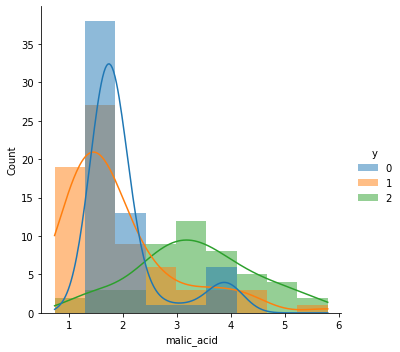

In [108]:
sns.displot(data=df, x="malic_acid", hue="y", kde=True, bins="sturges", edgecolor="none", palette="tab10")
plt.show()

Histogram z podziałem na grupy

Na wykresie poniżej trudniej ocenić, jak `malic_acid` zależy od typu wina.

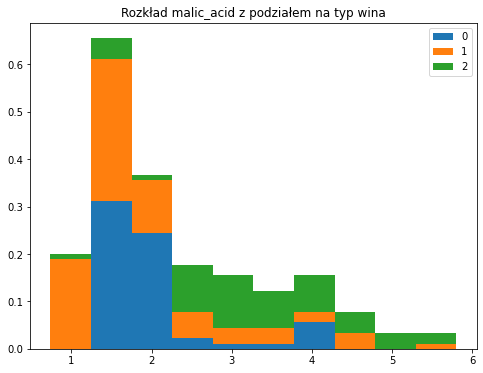

In [109]:
plt.figure(figsize=(8,6))
malic_acid_y = [df["malic_acid"][y == i] for i in range(3)]
plt.hist(malic_acid_y, density=True, histtype='bar', stacked=True, label=range(3))
plt.legend(loc="upper right")
plt.title('Rozkład malic_acid z podziałem na typ wina')
plt.show()

**Co zrobić, jeśli chcemy pokazać dwie zmienne kategoryczne**

In [110]:
# stwórzmy zmienną kategoryczną (bo w danych nie ma odpowiedniej :()
malic_acid_categorical = np.array(df["malic_acid"])
malic_acid_categorical = (malic_acid_categorical > np.quantile(malic_acid_categorical, 1/3)) + 0.0 + (malic_acid_categorical > np.quantile(malic_acid_categorical, 2/3))
malic_acid_categorical # wartość 0 oznacza małą wartość zmiennej, 1 średnią, 2 wysoką

array([1., 1., 1., 1., 2., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 2., 0., 2., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 2., 1., 2., 1., 2., 1., 2., 2., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 2., 0., 2., 0., 1., 0., 2., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 2., 1., 0., 1., 0., 0., 2., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 2., 1., 2., 0., 0., 0., 0., 0., 2.,
       2., 1., 1., 2., 2., 2., 1., 0., 1., 0., 2., 0., 2., 1., 2., 0., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       2., 0., 2., 2., 2., 1., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 2., 2.])

In [111]:
df['malic_acid_cat'] = malic_acid_categorical

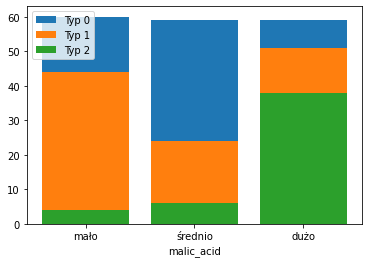

In [112]:
malic_acid_categorical[y==0]

ma_typ0 = np.unique(malic_acid_categorical[y==0], return_counts=True)[1]
ma_typ1 = np.unique(malic_acid_categorical[y==1], return_counts=True)[1]
ma_typ2 = np.unique(malic_acid_categorical[y==2], return_counts=True)[1]

plt.bar(range(3), height=ma_typ0, width=0.8, label='Typ 0', bottom=ma_typ1+ma_typ2)
plt.bar(range(3), height=ma_typ1, width=0.8, label='Typ 1', bottom=ma_typ2)
plt.bar(range(3), height=ma_typ2, width=0.8, label='Typ 2')

plt.xticks(range(3), ["mało", "średnio", "dużo"])
plt.xlabel("malic_acid")

plt.legend()
plt.show()

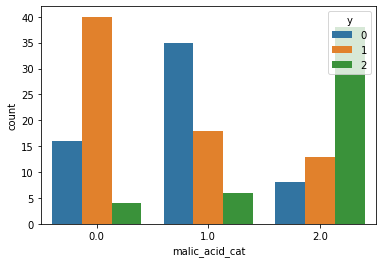

In [113]:
sns.countplot(x="malic_acid_cat", hue="y", data=df)
plt.show()

### Wykres pudełkowy

*Box and whiskers* - przedstawienie charakterystyk rozkładu na wykresie.

Opis na stronie: https://www.simplypsychology.org/boxplots.html

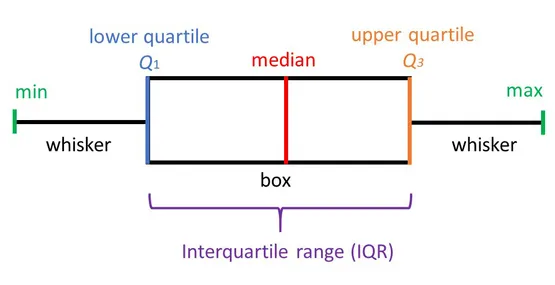

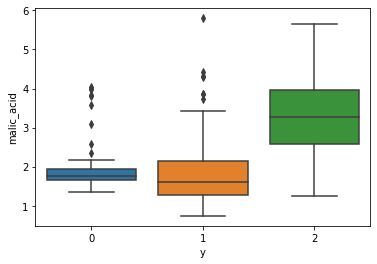

In [114]:
sns.categorical.boxplot(x="y", y="malic_acid", data=df)
plt.show()

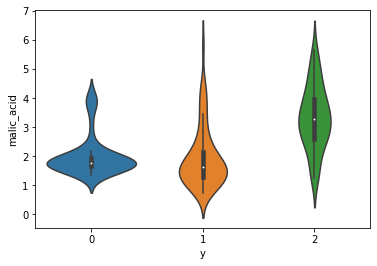

In [115]:
sns.categorical.violinplot(x="y", y="malic_acid", data=df)
plt.show()

#### Porówananie rozkładu zmiennej `alcohol` z uwzględnieniem poziomu `malic_acid` i typu wina

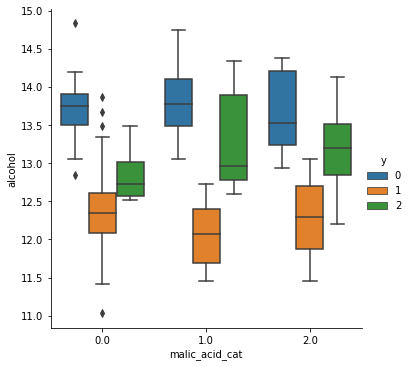

In [116]:
sns.catplot(x='malic_acid_cat', y="alcohol", hue="y", kind="box", data=df)
plt.show()

**Interaction plot - wykres interakcji**

Bardzo podobny wykres do tego powyżej - zaznaczone są średnie i ochylenia. "Interaction plot", ponieważ dobrze pokazuje, 
czy w grupach są interakcje. Jeśli nie ma, linie powinny być mniej więcej równoległe, jeśli są, 
linie mogą się nawet przecinać. Przydaje się przy **Anovie dwuczynnikowej (analiza wariancji)**.

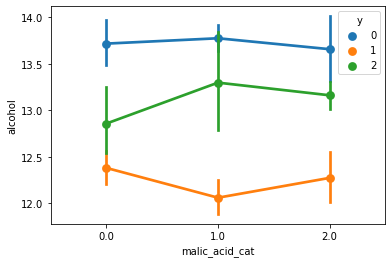

In [118]:
sns.pointplot(x='malic_acid_cat', y="alcohol", hue="y", kind="box", data=df)
plt.show()

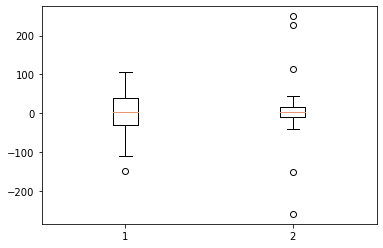

In [145]:
# wracając do porównania modeli z poprzedniej części
#  - zamiast liczyć dużo statystyk i porównywać, wygodniej jest narysować wykres

plt.boxplot(err_mod)
plt.show()

### Wykres rozproszenia

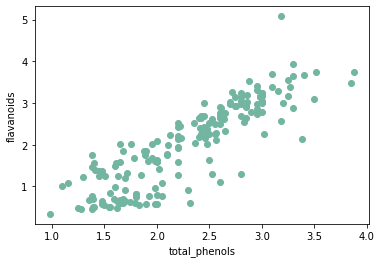

In [112]:
plt.scatter(df['total_phenols'], df['flavanoids'])
plt.xlabel("total_phenols")
plt.ylabel("flavanoids")
plt.show()

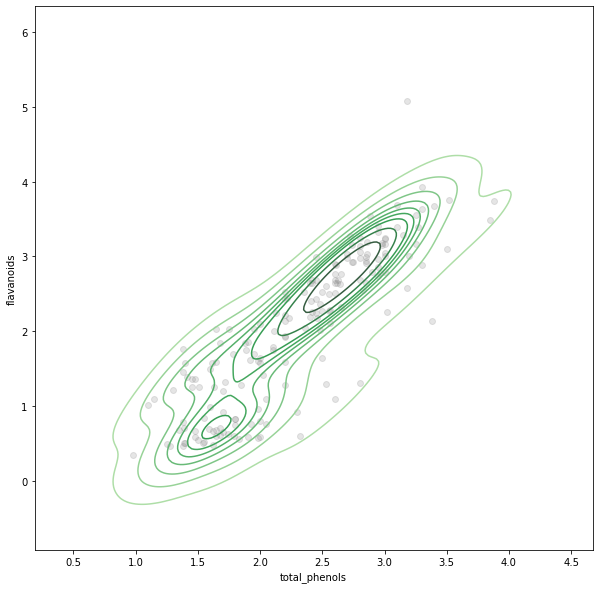

In [138]:
plt.figure(figsize=(10, 10))
plt.scatter(df['total_phenols'], df['flavanoids'], color="grey", alpha=0.2)
sns.kdeplot(x="total_phenols", y="flavanoids", data=df, cmap = "Greens_d")
plt.show()

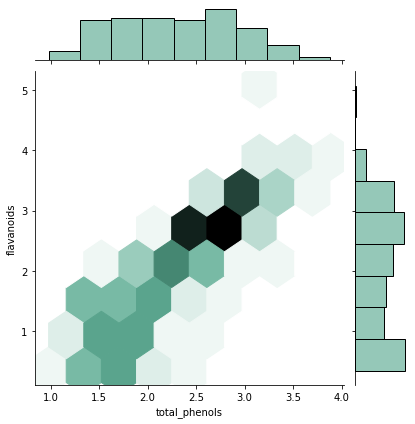

In [119]:
sns.jointplot(x="total_phenols", y="flavanoids", data=df, kind="hex")
plt.show()

#### seaborn

sns.funkcja(x="nazwa kolumny", y="nazwa innej kolumny", hue="grupa, po której chcemy dzielić", data="dane")

#### Zadanie (przedstawianie danych i wyciąganie wniosków)

Wczytaj dane korzystając z kodu umieszczonego poniżej. Dane zawierają historyczne informacje dotyczące udzielanych kredytu (zmienne w kolumnach od 1 do 20) i odpowiedzi klientów (ostatnia kolumna to zmienna `response` o wartościach 1 i 2 - 1 oznacza dobrego klienta, 2 złego). Dokładniejszy opis poszczególnych zmiennych można znaleźć na stronie, skąd dane pochodzą: https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/. 

 a) Przedstaw na wykresie empiryczny rozkład długości trwania kredytu (kolumna `duration`).
 
 b) Przedstaw na wykresie rozkład płci wśród kredytobiorców (`sex`).
 
 c) Na podstawie odpowiedniego wykresu oceń, czy wysokość udzielanego kredytu (`amount`) może zależeć od celu (`purpose`). Na jaki cel średnia wysokość kredytu jest największa?
 
 d) Na podstawie odpowiedniego wykresu określ, czy można mówić o zależności pomiędzy kwotą kredytu (`amount`) a długością (`duration`). Policz korelację Pearsona pomiędzy zmiennymi.
 
 e) Przedstaw na wykresie zależność pomiędzy warunkami mieszkaniowymi (`housing`) i rodzajem wykonywanej pracy (`job`). Co można powiedzieć na podstawie wykresu?

**Skrótowy opis najistotniejszych kolumn z zadania**

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

Attribute 17: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

In [255]:
df_zad = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", 
                   sep=" ", names=["chk_acct", "duration", "credit_his", "purpose", "amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", "present_resid", "property", "age", "other_install", "housing", "n_credits", "job", "n_people", "telephone", "foreign", "response"])

a)

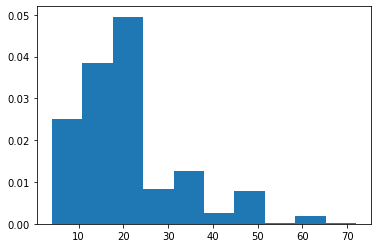

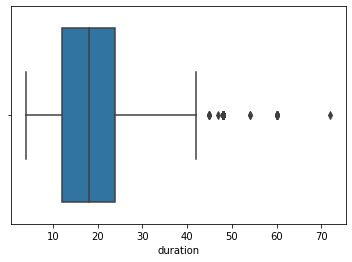

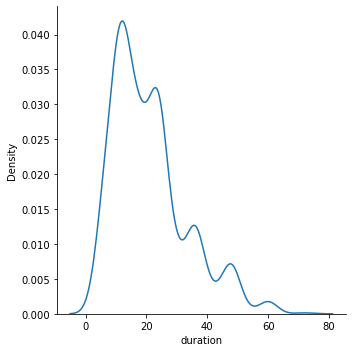

In [264]:
plt.hist(df_zad["duration"], density=True)
plt.show()

sns.boxplot(x="duration", data=df_zad)

sns.displot(x="duration", data=df_zad, kind="kde")

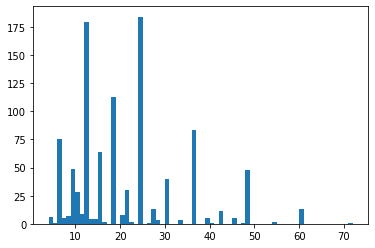

In [261]:
# trochę za dużo bin/koszyk/przedział
b = df_zad['duration'].max() - df_zad['duration'].min() 
plt.hist(df_zad['duration'], bins=b)
plt.show()

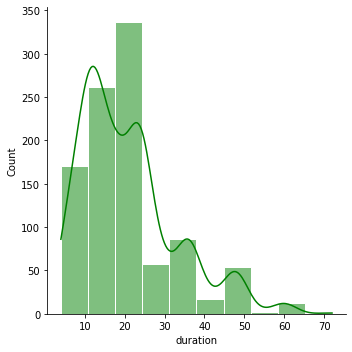

In [265]:
sns.displot(data=df_zad, bins=10, x='duration', kde=True, edgecolor='w', color = 'g')
plt.show()


b)

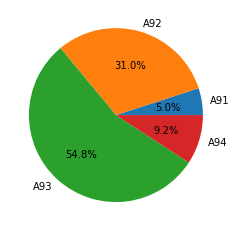

In [266]:
c = np.unique(df_zad.sex, return_counts=True)
labels = c[0].astype('str')
sizes = c[1]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

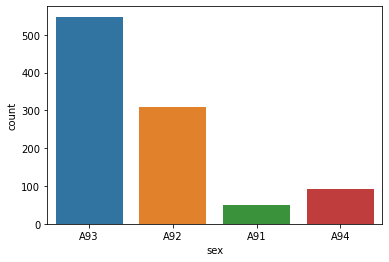

In [267]:
sns.countplot(x="sex", data=df_zad)
plt.show()

c)

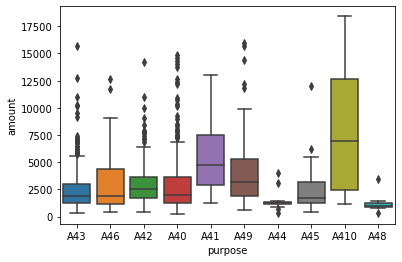

In [268]:
sns.boxplot(x='purpose', y='amount', data=df_zad)

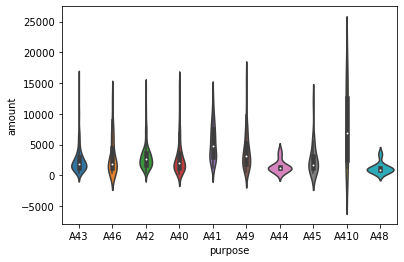

In [269]:
sns.categorical.violinplot(x="purpose", y="amount", data=df_zad)
plt.show()

### Zmienne w czasie/szeregi czasowe

In [320]:
series = pd.read_csv('daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])

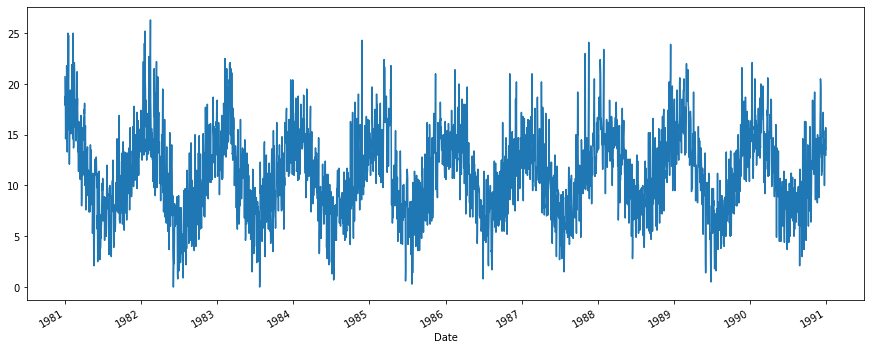

In [327]:
plt.figure(figsize=(15,6))
series.plot()
plt.show()

In [328]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values[0:363]

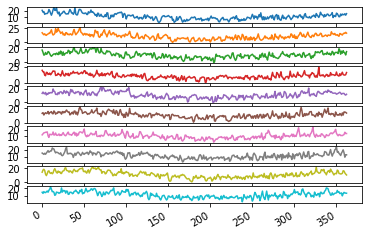

In [332]:
years.plot(subplots=True, legend=False)
plt.show()

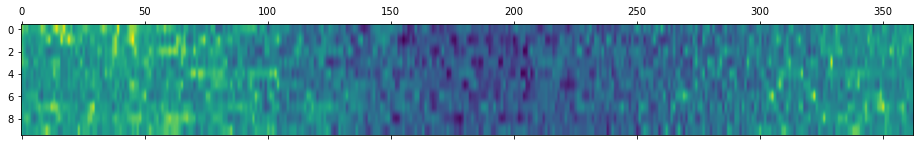

In [333]:
# na osi oy kolejne lata
# na osi ox minimalne temperatury w kolejnych latach
years_T = years.T
plt.matshow(years_T, interpolation=None, aspect='auto')
plt.show()

### Podsumowanie

To tylko wskazówki :) Ważne, żeby zastanowić się, co się chce przekazać i wybrać odpowiedni wykres.

 - proporcje grup (kiedy ich jest mało i chcemy przekazać coś prostego) - wykres kołowy
 - rozkład zmiennej dyskretnej/liczności w grupach - wykres słupkowy/histogram
 - rozkład zmiennej ciągłej - histogram (z dodaną wyestymowaną gęstością kde)
 - porównanie rozkładów w grupach - histogramy, wykresy pudełkowe/skrzypcowe
 - dwie zmienne ciągłe - wykres rozproszenia (z możliwymi dodatkami)
 - dwie zmienne dyskretne - np. słupki z oznaczonymi kolor proporcjami w grupach
 - szeregi czasowe - najczęściej punkty połączone linią, daty koniecznie uporządkowane (od najstarszej do najnowszej)

Złe wykresy:
    
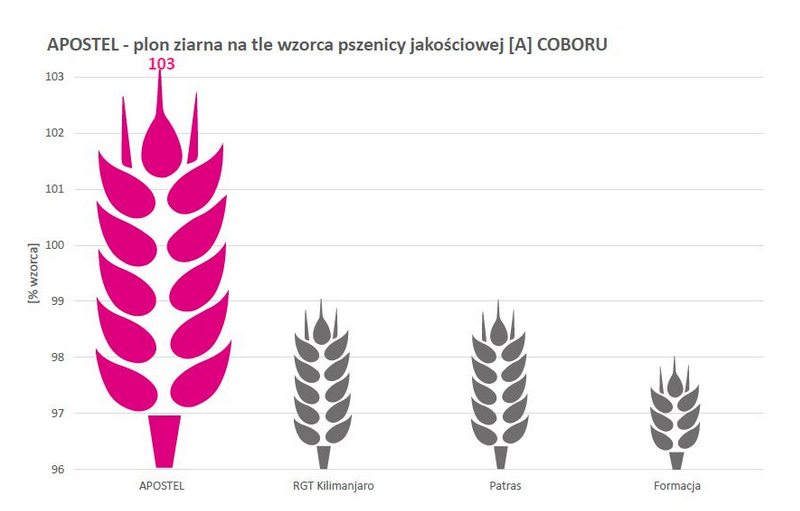

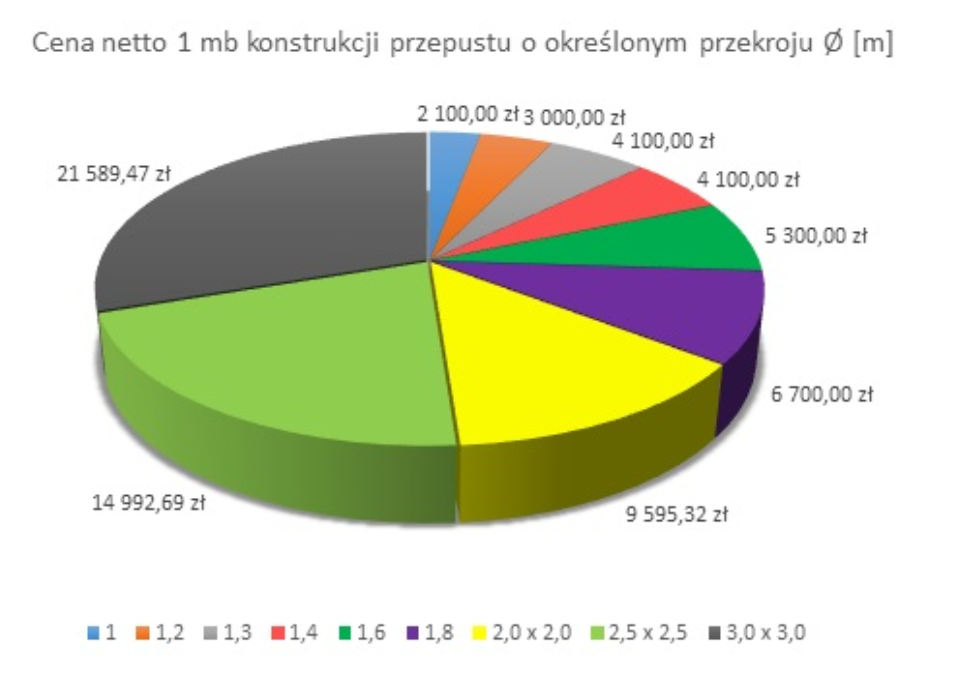

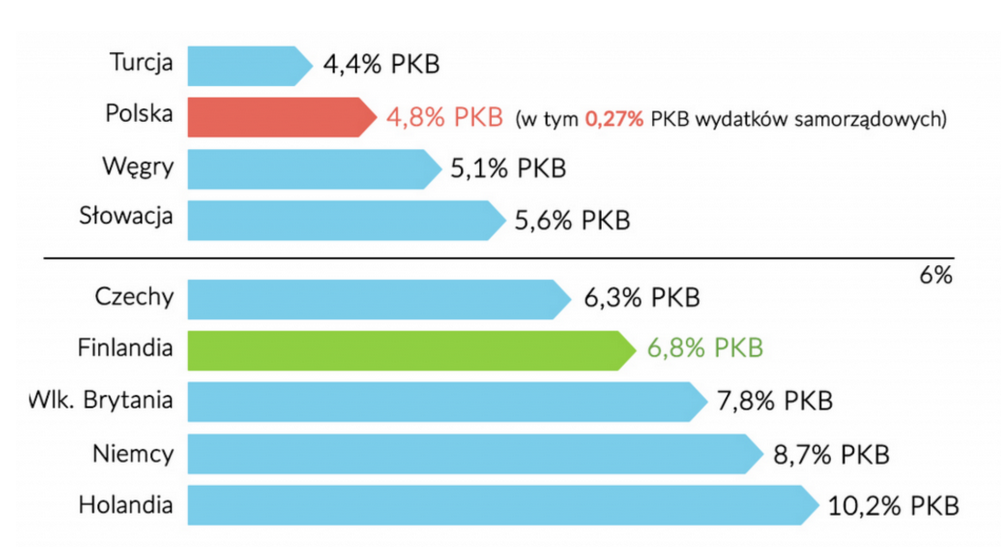

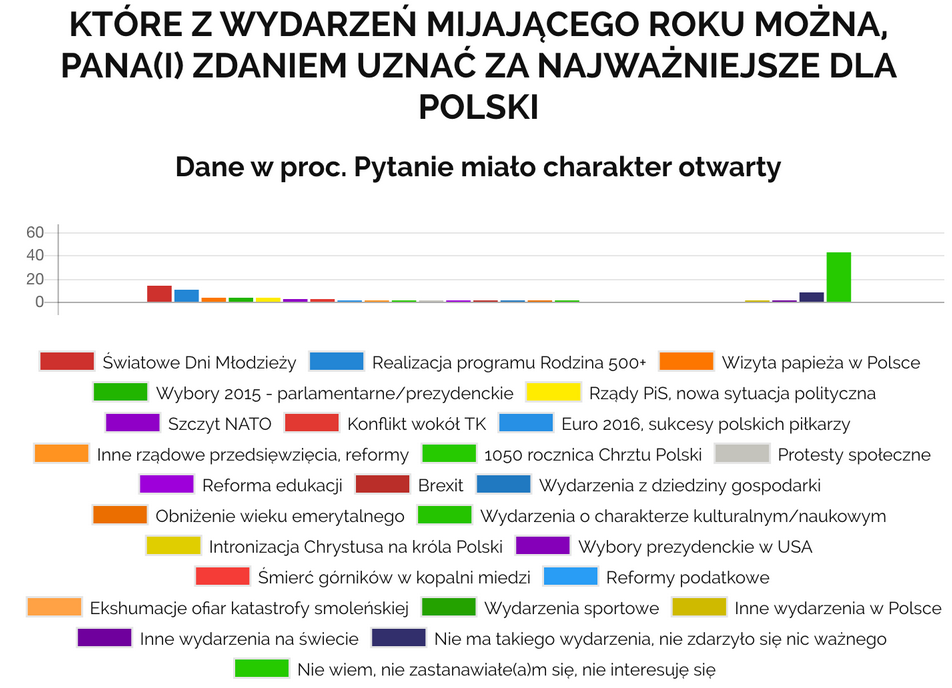

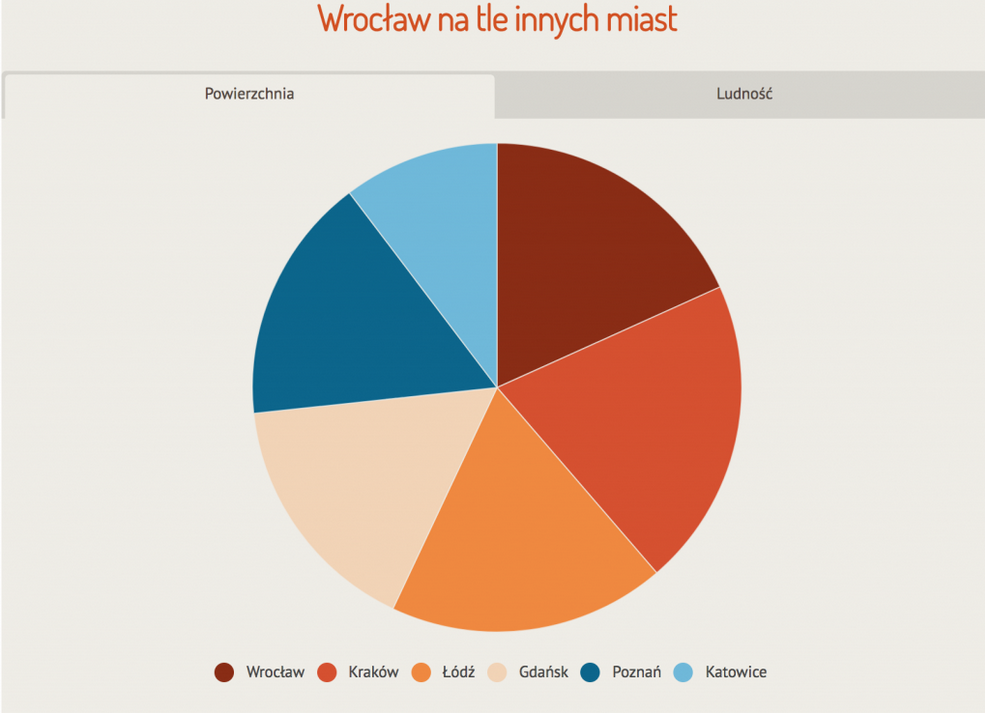

# Podstawy rachunku prawdopodobieństwa

## Prawdopodobieństwo klasyczne (przypomnienie z liceum)

więcej: http://smurf.mimuw.edu.pl/uczesie/?q=node/177

**Doświadczenie losowe** - 

**Zbiór zdarzeń elementarnych** - Zbiorem zdarzeń elementarnych nazywamy zbiór zawierający wszystkie możliwe wyniki badanego doświadczenia losowego. Zbiór zdarzeń elementarnych oznaczamy z reguły symbolem $\Omega$. Jego elementy nazywamy zdarzeniami elementarnymi, a podzbiory po prostu **zdarzeniami losowymi**. 

#### Przykład
Jeśli dośwadczenie, które chcemy opisać polega na wykonaniu czterech rzutów monetą, to zdarzeniami elementarnymi mogą być na przykład czteroelementowe ciągi skłądające się z liter O (orzeł) i R (reszka), tj. OORO, RROO itd. Ω jest w tym przypadku zbiorem wszystkich ciągów tej postaci.

Zgodnie z naszą definicją dowolny pozbiór Ω jest zdarzeniem, np. podzbiór {OOOO,OOOR,OORO,OROO,ROOO} to zdarzenie "wypadło więcej orłów niż reszek". 


#### Działania na zdarzeniach
Niech A,B⊆Ω będą dowolnymi zdarzeniami. Wtedy mamy następującą odpowiedniość:

 - A∪B : zaszło A lub B,
 - A∩B: zaszło jednocześnie A i B,
 - $A^c$: A nie zaszło,
 - A\B: zaszło A, ale nie B. 
 
#### Prawdopodobieństwo

Prawdopodobieństwem (lub funkcją prawdopodobieństwa) na zbiorze zdarzeń elementarnych Ω nazywamy funkcję P:P(Ω)→[0,1], taką, że:
 - P(Ω) = 1,
 - jeśli A,B⊆Ω rozłączne, to P(A∪B)=P(A)+P(B). 
 
#### Własności prawdopodobieństwa

 - P(∅)=0,
 - $P(A^c)=1−P(A)$
 - P(A)≤P(B) jeśli A⊆B
 - P(A1∪…∪Ak)=P(A1)+…+P(Ak) jeśli A1,…,Ak⊆Ω i Ai parami rozłączne,
 - P(A∪B)=P(A)+P(B)−P(A∩B) dla dowolnych A,B⊆Ω
 
(PD) Korzystając z definicji prawdopodobieństwa, udowodnić powyższe własności.

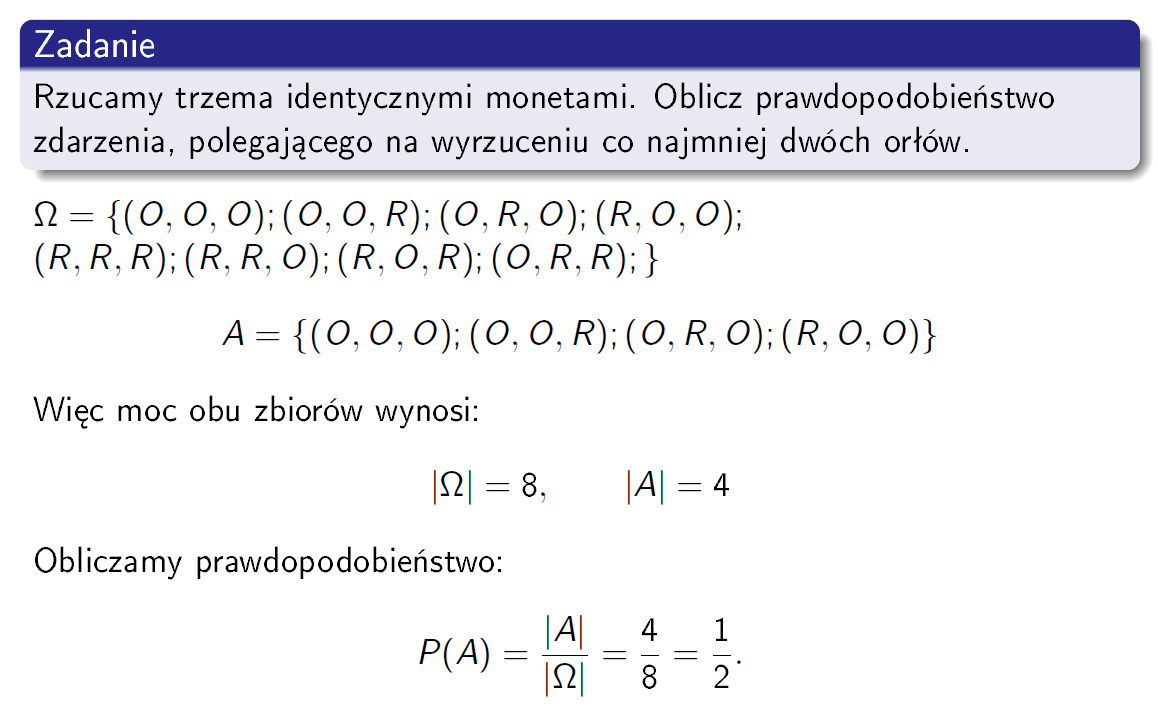

**Prawdopodobieństwo warunkowe** zdarzenia A pod warunkiem zdarzenia B
określone jest wzorem:
$$P(A|B) = \frac{P(A\cap B)}{P(B)},$$
dla $P(B) > 0$.

#### Zadanie (szybkie, na p-stwo warunkowe)

Ktoś rzucił 3 razy monetą i poinformował nas, że wypadła nieparzysta
liczba orłów (zdarzenie B). Jaka jest szansa, że wypadły 3 orły (zdarzenie
A).

odp: 

#### Wzór na prawdopodobieństwo całkowite

Jeżeli $H_1, H_2, \ldots, H_n$ jest rozbiciem $\Omega$ na zdarzenia o dodatnich
prawdopodobie«stwach, to dla dowolnego zdarzenia A
$$P(A) = \sum_{i=1^n} P(A|H_i)P(H_i)$$

#### Wzór Bayesa

Jeżeli $\{H_{i}\}_{i \in I}$ jest przeliczalnym rozbiciem $\Omega$ na zdarzenia o dodatnich oraz $P(A) > 0$, to dla dowolnego $j \in I$ mamy
 
$$P(H_j|A) = \frac{P(A|H_j)P(H_j)}{\sum_{i \in I}P(A|H_i)P(H_i)}$$

Prawdopodobieństwo hipotetyczne $P(H_j)$ nazywamy prawdopodobieństwem
**a priori** (przed doświadczeniem), $P(H_j|A)$ prawdopodobieństwem **a
posteriori** (po doświadczeniu).

**Przykład** Niech $H_j$ oznacza grupy kredytobiorców (np dobry-spłaca, średni-spłaca, ale czasem się spóźnia, zły-nie spłaca), zaś $A$ cechy kredytobiorców (posiada dom/mieszkanie/wynajmuje, rodzaj pracy, sytuacja rodzinna itp.) Na podstawie cech chcielibyśmy oceniać prawdopodobieństwo, do której grupy należy dany klient.

**Przykład** We wnioskowaniu bayesowskim stosowany jest taki scenariusz: zakładamy, że znamy rozkład $H_j$ (wiedza ekspercka o danym zjawisku; jeśli nie posiadamy takiej wiedzy, wybrany zostać może rozkład jednostajny). Jeśli rozkłady a priori i *likelihood* tzn. $P(A|H_j)$ są sprzężone, to rozkład a posteriori pochodzi z tej samej rodziny co rozkład a priori, tylko ma poprawione parametry.

więcej o wnioskowaniu bayesowskim: 
 - https://en.wikipedia.org/wiki/Bayesian_inference
 - https://en.wikipedia.org/wiki/Conjugate_prior

#### Zadanie (dłuższe, na wszystko)

 - Trzykrotnie rzucamy monetą. Obliczyć prawdopodobieństwo zdarzenia A – wyrzucono dwa razy orła, pod warunkiem, że zaszło zdarzenie B – w pierwszym rzucie wyrzucono orła.
 - W sklepie są 3 skrzynie z pomarańczami i 2 skrzynie z cytrynami. W każdej skrzyni z pomarańczami znajduje się 3% owoców zepsutych, natomiast w skrzyniach z cytrynami znajduje się 5% owoców zepsutych. Pobieramy losowo jeden owoc z dowolnej skrzyni. Jakie jest prawdopodobieństwo, że jest zepsuty.
 - Sytuacja jak wyżej. Pobrano losowo jeden owoc i okazało się, że jest zepsuty. Jakie jest prawdopodobieństwo, że była to pomarańcza?

odp.

$$\Omega = \{ooo, oor, oro, roo, rro, ror, orr, rrr\}$$

$$B = \{ooo, oor, oro, orr\}$$

$$B \cap A = \{oor, oro\}$$

$$P(A|B) = P(B \cap A) / P(B) = (2/8) / (4/8) = 1/2$$


odp. 
$$z=popsuty (zły)$$

$$P(z) = P(z|c)P(c) + P(z|p)P(p) = 0.038$$


In [270]:
0.03*0.6 + 0.05*0.4

0.038000000000000006

odp. $$P(p|z) = P(z|p)P(p)/*$$
$$* = P(z|p)P(p) + P(z|c)P(c) = P(z)=0.474$$

In [271]:
0.03*0.6/(0.03*0.6 + 0.05*0.4)

0.47368421052631565

### Niezależność zdarzeń 
Zdarzenia A i B nazywamy niezależnymi, gdy $P(A \cap B) = P(A)P(B)$

#### Zadanie (szybkie, ale do rozpisania, na niezależność)
Z 52 kart ciągniemy jedną. Czy zdarzenia w następujących parach są
niezależne:

 1) A - Wyciągnięcie damy, B - Wyciągnięcie karo

 2) A - Wyciągnięcie czerwonej karty, B - Wyciągnięcie kiera

odp.
1)
P(D) = 4/52

P(K) = 13/52

P(D i K) = 1/52

4/52*13/52 = 1/52 TAK

2)
P(C) = 26/52

P(K) = 13/52

P(C i K) = P(K) = 13/52

NIE

## Zmienne losowe

*Zmienne losowe to funkcje mierzalne względem przestrzeni probabilistycznych.* Jak to rozumieć?

Przestrzeń probabilistyczna składa się z trzech elementów: 
 - $\Omega$ - przestrzeń zdarzeń elementarnych (np. w przypadku dwóch rzutów monetą: orzeł-orzeł/orzeł-reszka/reszka-orzeł/reszka-reszka lub w przypadku wzrostu osoby dorosłej liczby rzeczywiste dodatnie)
 - $\mathcal{F}$ - przestrzeń zdarzeń losowych (czyli zawierających sensowne zdarzenia takie jak np. wypadł co  najmniej jeden orzeł, a więc zdarzenia orzeł-reszka/reszka-orzeł/reszka-reszka lub bycie średniego wzrostu, czyli należenie do przedziału 165-180 cm). Na $\mathcal{F}$ można patrzeń w ten sposób, że to zbiór wszystkich sensownych podzbiorów $\Omega$
 - $\mathcal{P}$ - prawdopodobieństwo, czyli *miara*
 
Zmienna losowa ma być funkcją, która umie tłumaczyć zdarzenia losowe na liczby i dla każdego takiego zdarzenia losowego możemy określić, jakie jest jego prawdopodobieństwo. W przypadku rzutu monetą zmienną losową jest np. taka funkcja:
$X(orzeł) = 1$, $X(reszka) = 0$ i w przypadku uczciwej monety mamy $P(X=1) = P(X=0)=1/2$. Wzrost sam w sobie jest dodatnią liczbą rzeczywistą, więc wystarczy $X(wzrost) = wzrost$. Dodatkowo jeśli umiemy podać $P(X \in B)$ dla dowolnego $B \in \mathcal{F}$, to mamy poprawnie określoną zmienną losową.

Zmienne losowe mogą być:
 - **dyskretne** - czyli mogą przyjmować skończoną liczbę wartości lub przeliczalną (np. 0, 1, 2, 3, ...)
 - **ciągłe** - czyli mogą przyjmować rzeczywiste wartości/rzeczywiste dodatnie itp.
 
## Dystrybuanta (CMF/CDF - cumulative mass/density function)

Dystrybuanta zmiennej losowej określona jest następująco:

$$F(t) = P(X \leq t) \textrm{ dla } t \in (-\infty, \infty).$$

Ważne własności:
 - $\lim \limits_{t \to -\infty}$ F(t) = 0
 - $\lim \limits_{t \to \infty}$ F(t) = 1
 - F jest funkcją niemalejącą
 - prawostronnie ciągła

## Funkcja masy/gęstość zmiennej losowej (PMF - probability mass function, PDF - probability density function)

 - dla zmiennych losowych dyskretnych $X$ o wartościach w zbiorze $\{i_1, i_2, \ldots, i_k\}$ mamy funkcję masy:
 
 $$P(X = i_j) = p_{i_j} \textrm{ dla } j = 1, 2, \ldots, k$$
 
 - dla zmiennych losowych ciągłych mamy gęstość $f$:
 
 $$P(X \in (a, b)) = \int \limits_b^{a} f(t) dt$$
 
Ważne własności:
 - prawdopodobieństwo sumuje się do 1, czyli $\sum_j p_{i_j} = 1$ i $\int_{-\infty}^{\infty} f(t) dt = 1$.
 - prawdopodobieństwo nie może być ujemne, więc wszystkie wartości $p_{i_j} \geq 0$ i $f(t) \geq 0$
 
## Kwantyle/odwrotna dystrybuanta (PPF - percent-point function / inverse cumulative distribution function)
 
Dla każdej dystrybuanty $F$, a więc też dla każdej zmiennej losowej, określa się tak zwany kwantyl rzędu $p$, gdzie $0 < p < 1$. Jest to liczba:

$$
q_p = \min \{ x : F(x) \ge p \}.
$$

W przypadku gdy dystrybuanta jest funkcją odwracalną, określenie kwantyla znacznie się upraszcza:

$$
q_p = F^{-1}(p).
$$


Wówczas kwantyl ma prostą interpretację w języku zmiennych losowych. Mianowicie:

$$
P(X < q_p) = P(X \le q_p) = F(q_p) = p,
$$

$$
P(X > q_p) = 1 - P(X \le q_p) = 1 - F(q_p) = 1- p.
$$

### Po co zmienne losowe?

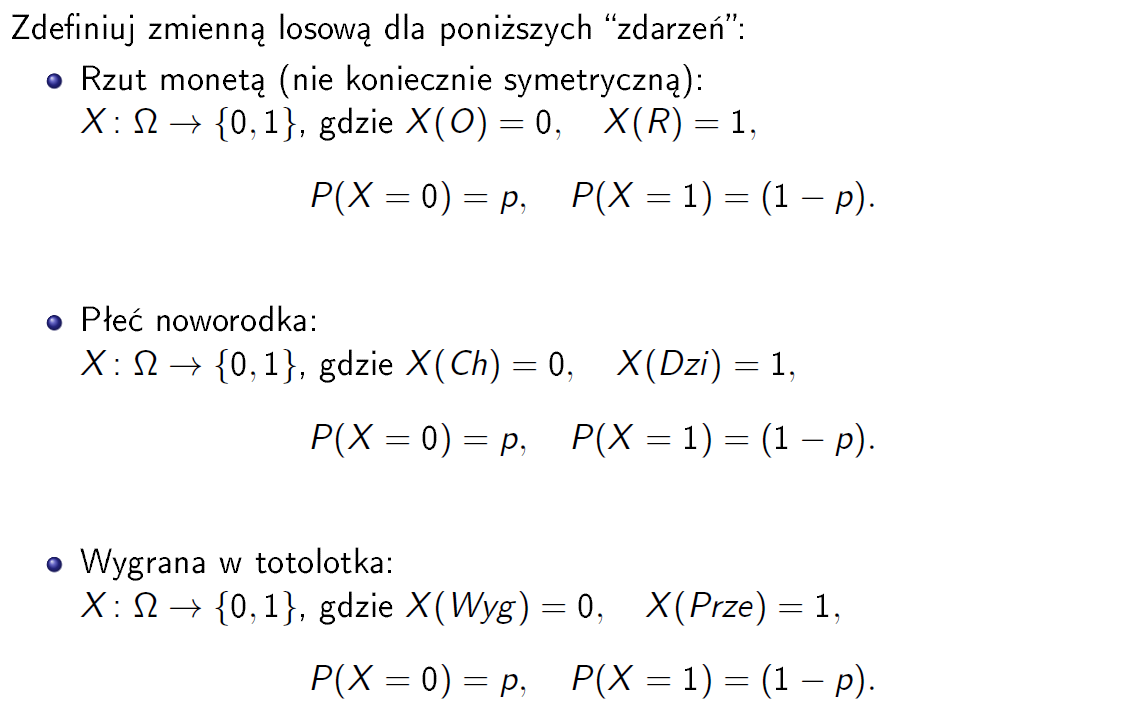

### Rozkład Bernoulliego

Próba Bernoulliego (rozkład zero-jedynkowy) --  dyskretny rozkład prawdopodobieństwa, dla którego zmienna losowa przyjmuje tylko wartości: $0$ lub $1$:

$$
P(X=k) = 
\left\{ \begin{array}{ll}
p & \textrm{gdy} k = 0\\
1-p & \textrm{gdy} k \neq 1
\end{array} \right. ,
$$
gdzie $0 < p < 1$, in \{0, 1\}.


Powyższą funkcję opisującą prawdopodobieństwo wystąpienia każdego z elementów nazywamy funkcją masy prawdopodobieństwa (**probability mass function (PMF)**), zaś $p$ jest parametrem.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bernoulli.html

In [4]:
p = 0.5 # ustalamy wartość parametru
bernoulliDist = stats.bernoulli(p) # definiujemy zmienną losową

In [5]:
p_tails = bernoulliDist.pmf(0) # liczymy wartość PMF (gęstości) w punkcie 0
p_heads = bernoulliDist.pmf(1)
print(p_tails)
print(p_heads)

0.5
0.5


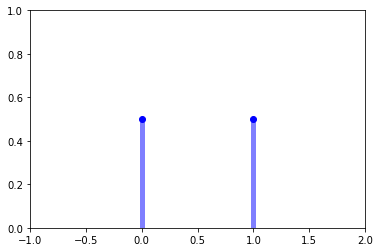

In [15]:
# Funkcja masy dla r. Bernoulliego
p = 0.5
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-1,2])
ax.set_ylim([0,1])
x = np.arange(0, 2)
ax.plot(x, stats.bernoulli.pmf(x, p), 'bo', label="PMF r. Bernoulliego")
ax.vlines(x, 0, stats.bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
plt.show()

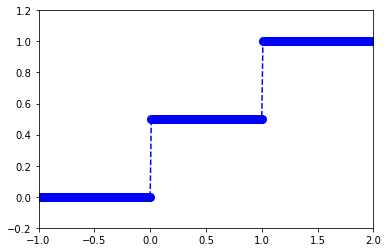

In [17]:
# Dystrybuanta r.Bernoulli
p = 0.5
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-1,2])
ax.set_ylim([-0.2,1.2])

x = np.arange(-5, 5, 0.01)
ax.plot(x, stats.bernoulli.cdf(x, p), 'bo--', ms=8, label='bernoulli cdf')
rv = stats.bernoulli(p)
plt.show()

$$F(t) = \left\{\begin{array}{ll} P(X \leq t) = 0 & \textrm{ dla } t < 0 \\
P(X \leq t) = P(X = 0) = p & \textrm{ dla } 0 \leq t < 1 \\
P(X \leq t) = P(X = 0) + P(X = 1) = 1 & \textrm{ dla } t \geq 1
\end{array}\right.$$

### Rozkład dwumianowy

 - Dla dzieci urodzonych w danym szpitalu, w danym dniu, ile z nich będzie dziewczynkami?
 - Ilu uczniów w danej klasie ma zielone oczy?
 - Ile komarów z roju umrze po zastosowaniu oprysku środkiem owadobójczym?

Gdy zmienna losowa $X$ ma rozkład dwumianowy z parametrami $p$ i $n$, zapisujemy go jako $X \thicksim bin(n,p)$, a gęstość wyrażona jest wzorem:
$$
P(X = k) = {n \choose k} p^k (1-p)^{n-k},
$$
gdzie
$
{n \choose k} = \frac{n!}{k!(n-k)!}.
$

Rozkład odpowiada sytuacji, gdy powtarzamy $n$ razy rzut monetą. 

Prawdopodobieństwo, że uzyskamy dokłądnie $k$ orłów można rozpisać w następujący sposób:
 - ${n \choose k}$ - z $n$ rzutów wybieramy $k$ w których wypadły orły
 - $p^k$ - prawdopodobieńswo tego, że wypadł orzeł to $p$ i to się zdarzyło $k$ razy
 - $(1-p)^{n-k}$ - prawdopodobieńswo tego, że wypadła reszka to $1-p$ i to się zdarzyło $n-k$ razy

In [206]:
(p, n) = (0.5, 7)
binomDist = stats.binom(n, p)

In [207]:
binomDist.rvs(100) # losujemy 100 liczb z rozkładu

array([3, 3, 1, 3, 4, 3, 2, 3, 6, 2, 3, 1, 4, 2, 4, 3, 4, 3, 0, 3, 2, 3,
       3, 4, 3, 1, 3, 3, 4, 2, 4, 3, 2, 5, 2, 5, 4, 3, 1, 3, 4, 5, 4, 3,
       3, 5, 3, 2, 3, 7, 3, 2, 1, 2, 3, 4, 4, 1, 5, 3, 2, 4, 4, 3, 4, 3,
       5, 5, 2, 2, 4, 0, 5, 3, 4, 1, 2, 2, 2, 3, 3, 5, 4, 4, 2, 3, 6, 4,
       5, 1, 2, 2, 1, 5, 3, 7, 4, 3, 6, 5])

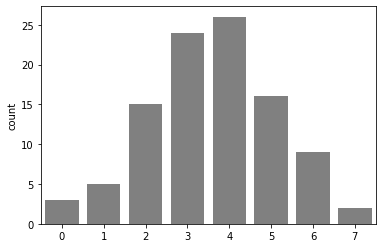

In [209]:
sns.countplot(x=binomDist.rvs(100), color="grey")
plt.show()

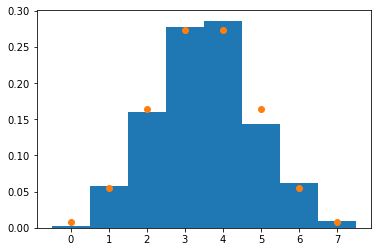

In [360]:
plt.hist(binomDist.rvs(1000), bins=np.arange(-0.5, n + 1.5, 1), density=True)
x = np.arange(0, n + 1, 1)
plt.plot(x, binomDist.pmf(x), "o")
plt.show()

In [85]:
# P(X=0) + P(X=1) + P(X=2)
print(binomDist.pmf(0) + binomDist.pmf(1) + binomDist.pmf(2))
# P(X <= 2) = p
print(binomDist.cdf(2))
# q takie, że P(X <= q) = p
print(binomDist.ppf(binomDist.cdf(2)))

0.2265625000000001
0.2265624999999998
2.0


#### Zadanie (rozkład dwumianowy)

Policz prawdopodobieństwo, że rzucając dwadzieścia razy oszukaną monetą (bo prawdopodobieństwo wypadnięcia orła jest dwa razy większe niż reszki) 
 - uzyskano podzielną przez 3 liczbę orłów
 - uzyskano nie mniej orłów niż reszek.
 
Następnie narysuj wykres funkcji masy prawdopodobieństwa dla tego rozkładu.

### Rozkład normalny

Gęstość zmiennej losowej $X$ o rozkładzie normalnym z parametrami $\mu$ i $\sigma$ (ozn. $X \sim N(\mu, \sigma^2)$) jest dana przez 
$$
f_X(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{-\frac{(x-\mu)^2}{2\sigma^2} }.
$$

Jeżeli $f_{X} \colon \mathbb{R} \to [0,+\infty] $ jest gęstością ciągłej zmiennej losowej $X$ to
$$
\int_{-\infty}^x f_{X}(t)dt=P((-\infty, x])=F_X(x),
$$
gdzie $F_X$ jest dystrybuantą zmiennej losowej $X$. 

#### Zadanie (rozkład normalny - gęstość, dystrybuanta, kwantyle)

a) Narysuj wykres funkcji gęstości i dystrybuantę zmiennej losowej $X$ dla $\mu = 0$ i $\sigma = 1$.

b) Wylosuj próbkę liczącą $n=100$ obserwacji i narysuj jej histogram (na tym samym wykresie gęstości, co w a)).

c) Dla $X$ z a) policz <ul>
<li> $P (X \leq -0.4)$,</li>
<li> $P (X \in (-0.2, 0.6))$,</li> 
<li> $P (X \geq -0.2)$,</li>
<li> $P ( |X| \leq 1)$.</li>
</ul>

d) Znajdź taką wartość $q$, że $P(X \leq q) = 0.05$. Zaznacz tę wartość pionową linią na wykresie gęstości z podpunktu a).

**Gęstość/dystrybuanta r.normalny**

Dystrybuanta to prawdopodobieństwo $P(X \in [-\infty, x_0] )$, gdzie $x_0 \in \mathbb{R}$.
Zgodnie z naszymi wzorami
$$
P(X \in [-\infty,x_0] )  = \int_{\infty}^{x_{0}} f_{X}(x)dx=P(X\leq x_0)=F_{X}(x_0) 
$$
Zatem wartość dystrybuanty w punkcie $x_0$ to pole pod wykresem gęstości do punktu $x_0$.

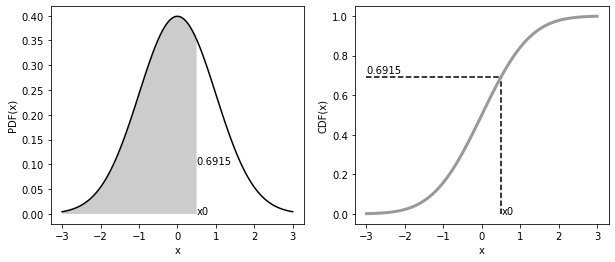

In [377]:
(mu, sigma) = (0,1)
nd = stats.norm(mu, sigma)
x0 = 0.5
inte = nd.cdf(x0)

x = np.linspace(-3, 3, 100)
yp = nd.pdf(x)
y = nd.cdf(x)
x1 = np.linspace(-3, x0)
y1 = nd.pdf(x1)

figs, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(x, yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].text(x0, 0.1, np.round(inte,4))
axs[0].text(x0, 0, 'x0')
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(-3, nd.cdf(x0)+0.02, np.round(nd.cdf(x0), 4))
axs[1].text(x0 + 0.03, 0, 'x0')
plt.vlines(x0, 0, nd.cdf(x0), linestyles='--')
plt.hlines(nd.cdf(x0), -3, x0, linestyles='--')
plt.show()

#### Zadanie (rozkład normalny - gęstość-dystrybuanta-kwantyle CD)

Napisz skrypt, który będzie liczył prawdopodobieństwo:

$$
P(X \in (-\infty,x_1] \cup [x_2, \infty))  = \int_{\infty}^{x_{1}} f_{X}(x)dx + \int_{x_{2}}^{\infty} f_{X}(x)dx=P(X\leq x_1 \ or \ X\geq x_2)=F_{X}(x_1)+1-F_{X}(x_2) 
$$
<ul>
<li>Sprawdź czy wszystkie równości zachodzą? </li>
<li>Narysuj gęstość i dystrybuantę oraz zaznacz na niej wszystkie dane. </li>
<li>Znajdź takie $x_1=-x_2$, by $P(X \in (-\infty,x_1] \cup [x_2, \infty)) = 0.05$. *Podpowiedź: rozkład normalny jest symetryczny, wystarczy więc znaleźć $x_1$ takie, że $P(X \in (-\infty,x_1])=0.025$*.</li>
</ul>

### Rozkład jednostajny

Rozkład jednostajny na odcinku $[a,b]$

Gęstość zmiennej losowej $X$ o rozkładzie jednostajnym na odcinku $[a,b]$ jest dana przez 
$$
\chi_{[a,b]}(x) = \left\{ \begin{array}{ll}
\frac{1}{b-a} & \textrm{gdy}  x \in [a,b]\\
0 & \textrm{gdy } x \notin [a,b]
\end{array} \right. ,
$$
gdzie $a<b$ oraz $a,b \in \mathbb{R}$.

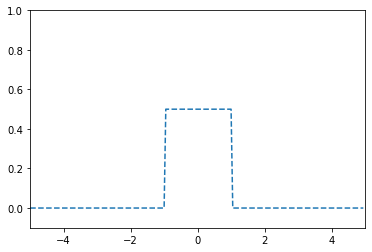

In [210]:
# zmienna
t = np.arange(-5, 5, 0.05)
uniform = stats.uniform(-1,2)
# gęstość
fig, ax = plt.subplots(1, 1)
plt.plot(t, uniform.pdf(t), '--', ms=8, label='frozen pdf')
ax.set_xlim([-5,5])
ax.set_ylim([-0.1,1])
plt.show()

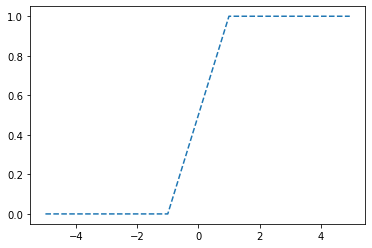

In [126]:
# dystrybuanta

fig, ax = plt.subplots(1, 1)
ax.plot(t, uniform.cdf(t), '--', ms=8, label='bernoulli cdf')
plt.show()

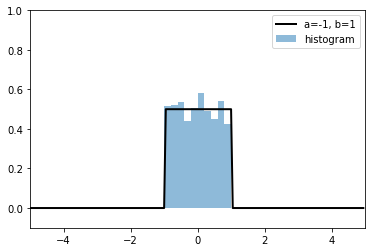

In [190]:
# gęstość + histogram dla próbki
uniform = stats.uniform(-1,2)
r = uniform.rvs(size=1000)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, uniform.pdf(t), 'k-', lw=2, label='a=-1, b=1')
ax.set_xlim([-5,5])
ax.set_ylim([-0.1,1])
ax.legend()
plt.show()

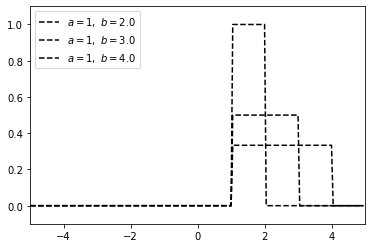

In [128]:
# gęstość - różne parametry

a_values = [1, 1, 1]
b_values = [1, 2, 3]
fig, ax = plt.subplots(1, 1)
for a, b in zip(a_values, b_values):
    dist = stats.uniform(a, b)
    plt.plot(t, dist.pdf(t), ls="--", c='black', label=r'$a=%1.f,\ b=%.1f$' % (a, a+b))
ax.set_xlim([-5,5])
ax.set_ylim([-0.1,1.1])    
plt.legend()
plt.show()

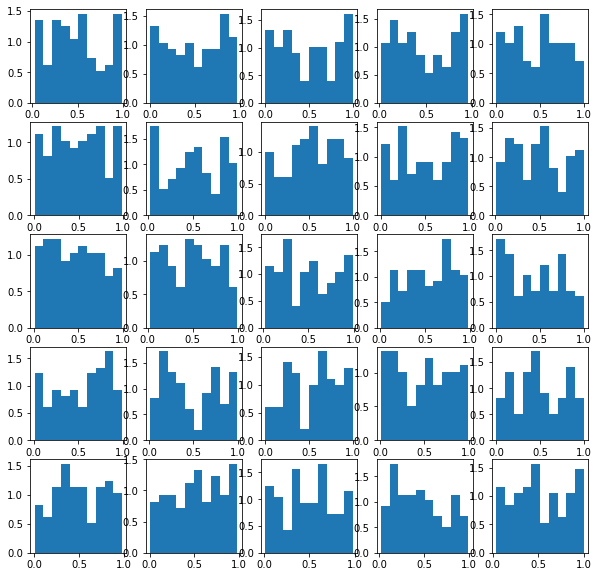

In [130]:
# dużo próbek vs gęstość
uniform = stats.uniform(0,1)
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in np.arange(0,5):
    for j in np.arange(0,5):
        r = uniform.rvs(size=100)
        ax[i,j].hist(r, density=True)
plt.show()

# Rozkłady i ich charakterystyki liczbowe

## Charakterystyki liczbowe

**Wartość oczekiwana** Wartością oczekiwaną (średnią, przeciętną wartością; ozn $\mathbb{E}X$) zmiennej $X$ nazywamy:
 - $\sum \limits_i x_i p_i$, jeśli $X$ jest dyskretną zmienną losową przyjmującą wartości $x_i$ i $P(X=x_i) = p_i$.
 - $\int \limits_{-\infty}^{\infty} x f(x) dx$ jeśli $X$ jest zmienną ciągłą o gęstości $f$.
 
**Kwantyle** (patrz wyżej)
 
**Wariancja** Wariancją zmiennej losowej $X$ o wartości oczekiwanej $\mathbb{E}X$ nazywamy $\textrm{Var} (X) = \mathbb{E}(X- \mathbb{E}X)^2$. Czasem oznaczamy $\sigma^2$.

**Odchylenie standardowe** to $\sqrt{\textrm{Var} (X)}$. Ozn. $\sigma$.

**Kurtozę** liczy się tak: $\frac{\mathbb{E}(X - \mathbb{E}X)^4}{\sigma^4} - 3$ (jak spłaszczony jest rozkład względem normalnego)

**Skośność** $3\frac{\mu - Median}{\sigma}$

### Rozkład normalny CD

Jeśli $X \sim N(\mu, \sigma^2)$, to $\mathbb{E}X = \mu$, a $\textrm{Var} = \sigma^2$.

Jeśli $X_1\sim N(\mu_1, \sigma_1^2)$ i $X_2\sim N(\mu_2, \sigma_2^2)$ i śa to zmienne niezależne, to 
 - $aX_1 \sim N(a\mu_1, a^2 \sigma_1^2)$
 - $X_1 + X_2 \sim N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$

In [182]:
normDist = stats.norm(2, 3) # podajemy mi i sigma (nie sigma^2)

In [183]:
normDist.mean(), normDist.std(), normDist.var()

(2.0, 3.0, 9.0)

#### Zadanie
Niech $X_1$ ma rozkład $N(\mu = 10; \sigma^2= 25)$ oraz $X_2$ ma rozkład
$N(\mu = 1; \sigma^2= 9)$ oraz $X_3$ ma rozkład $N(\mu = 4; \sigma^2= 16)$ i zmienne są niezależne. Jaki rozkład
mają

a) X1 + X2 + X3,

b) 2X1,

c) 2X1 + 3X2

odp:

#### Zadanie

Niech $X_1, X_2, ..., X_n$ będą niezależnymi zmiennymi losowymi o rozkładzie $N(\mu, \sigma^2)$. Jaki rozkład mają

a) $X_1 + X_2 + ... + X_n$

b) $\bar X$

c) $\sqrt{n}\frac{\bar X - \mu}{\sigma}$

odp.:

#### Reguła Trzech Sigm

Reguła Trzech Sigm dla danego rozkładu normalnego $N(\mu,\sigma)$ oznacza, że w przedziale $[\mu-3\sigma,\mu+3\sigma]$ znajduje się 99.7% wszystkich obserwacji.

In [188]:
def show_SD(axis, xi, yi, text):
    '''Show the area covered by 1/2/3 SDs'''
    
    fc = '#DDDDDD'
    axis.plot(x,y)
    axis.fill_between(xi, yi, facecolor=fc)
    
    axis.text(0, 0.05, text, horizontalalignment='center', fontsize=25)
    axis.set_xlim([-3.5, 3.5])
    axis.set_ylim([-0.0, 0.5])
    axis.set_yticks([])

#### Zadanie

Policz prawdopodobieństwa:
<ul>
<li>$P(X \in [\mu-\sigma,\mu+\sigma])$</li>
<li>$P(X \in [\mu-2\sigma,\mu+2\sigma])$</li>
<li>$P(X \in [\mu-3\sigma,\mu+3\sigma])$</li>
</ul>

i zaznacz je na wykresie. Możesz przyjąć $X \sim N(0, 1)$.

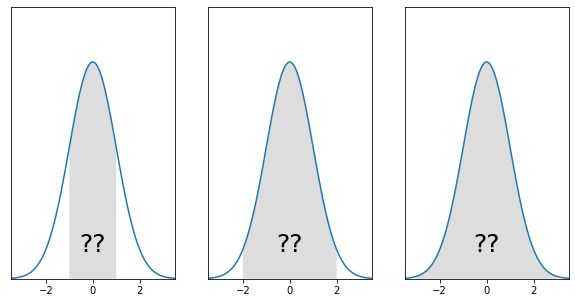

In [378]:
nd = stats.norm() # z domyślnymi parametrami, tzn. średnia=0, sd=1
x = np.linspace(-3.5, 3.5,100)
x1 = np.linspace(-1,1)
x2 = np.linspace(-2,2)
x3 = np.linspace(-3,3)

y = nd.pdf(x)
y1 = nd.pdf(x1)
y2 = nd.pdf(x2)
y3 = nd.pdf(x3)
fig, axs = plt.subplots(1,3, sharey=True, figsize=(10, 5))
show_SD(axs[0], x1, y1, "??")    
show_SD(axs[1], x2, y2, "??")    
show_SD(axs[2], x3, y3, "??")  
plt.show()

## Inne rozkłady

### Rozkład Poissona

Przykłady:
 - Ile groszy znajdę podczas mojego spaceru do domu?
 - Ilu dzieci urodzi się dzisiaj w szpitalu?
 - Ile jest dziur na 100 metrowym odcinku drogi?
 
Rozkład Poissona, podobnie jak rozkład dwumianowy, mówi o "sukcesach", ale w tym przypadku nie ma ustalonej liczby prób, więc nie ma również ustalonej maksymalnej liczby sukcesów. Parametr $\lambda$ w tym przypadku oznacza średnią/przewidywaną liczbę sukcesów.

Zmienna losowa $X$ ma rozkład Poissona o parametrze $\lambda > 0$, jeśli

$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

dla $k=0, 1, ...$.

#### Zadanie (rozkład Poissona)

Proszę:
<ul>
<li> zdefiniuj zmienną losową o rozkładzie  Poissona $\lambda=2$ </li>
<li> narysuj dla niej gęstość i dystrybuantę </li>
<li> wylosuj próbkę i narysuj histogram </li>
<li> narysuj kilka gęstości rozkładu Poissona $\lambda=1,4,10$ </li>
</ul>

### Rozkład chi kwadrat $\chi^2$

Rozkład chi kwadrat o $n$ stopniach swobody ma gęstość:

$$
f_{X}(x) = 
\left\{ \begin{array}{ll}
{\frac {1}{2^{\frac {n}{2}}\Gamma \left({\frac {n}{2}}\right)}}\;x^{{\frac {n}{2}}-1}e^{-{\frac {x}{2}}} 
   & \textrm{gdy } x \geq 0\\
0 & \textrm{gdy } x < 0 
\end{array} \right. ,
$$

gdzie $\Gamma$ oznacza funkcję Gamma https://pl.wikipedia.org/wiki/Funkcja_\%CE\%93

Jeśli $X_1, X_2, ..., X_n$ niezależne o rozkładzie standardowym normalnym, to $Y = \sum_{i=1}^n X_i^2 \sim \chi^2_{n-1}$.

#### Zadanie (chi kwadrat - suma normalnych)

 - Wygeneruj 100 obserwacji z rozkładu $\chi^2$ o $5$ stopniach swobody korzystając z faktu, że $Y = \sum_{i=1}^5 X_i^2 \sim \chi^2_5$, jeśli $X_i \sim N(0, 1)$ i parami niezależne. Narysuj histogram i nanieść na niego gęstość $\chi^2_5$.
 - Narysuj gęstości dla df=1, 10, 20, 50.

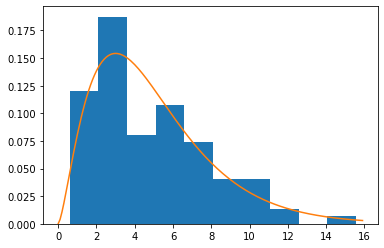

In [23]:
X = stats.norm(0, 1)
x = X.rvs((100, 5))
y = np.sum(x**2, axis=1)

plt.hist(y, density=True)
y_seq = np.arange(0, 16, 0.1)
plt.plot(y_seq, stats.chi2(df=5).pdf(y_seq))
plt.show()

Jeżeli mamy niezależne obserwacji $X_1, X_2, ..., X_n$ z rozkładu $N(\mu, \sigma^2)$, to
$$(n-1)\frac{s^2}{\sigma^2} \sim \chi^2_{n-1},$$
gdzie $s^2 = \frac{1}{n-1}\sum_{i=1}^n (X_1 - \bar X)^2$.

#### Zadanie ($\chi^2$ - test)

Producent pigułek na ból głowy zobowiązał się dostarczyć pigułki z odchyleniem standardowym $\sigma = 0.05$. 

Z pewnej partii pigułek wybrano próbkę $n=13$ pigułek o wagach: 

3.04, 2.94, 3.01, 3.00, 2.94, 2.91, 3.02, 3.04, 3.09, 2.95, 2.99, 3.10, 3.02 g.


Pytanie: Jakie jest prawdopodobieństwo otrzymania odchylenia standardowego większego niż przy powyższym badaniu?

 - policz wartość $s(x_1, x_2, ..., x_n)^2 = s_{probka}^2$ dla próbki
 - policz $(n-1)\frac{s_{probka}^2}{\sigma^2}$
 - policz $P\left((n-1)\frac{s^2(X_1, X_2, ..., X_n)}{\sigma^2} > (n-1)\frac{s_{probka}^2}{\sigma^2}\right)$

#### Zadanie - chi kwadrat - rozkład statystyki

Wygeneruj próbkę $n=100$ obserwacji z 
 - rozkładu jednostajnego dyskretnego o $k$ wartościach $\{0, 1, ..., k-1\}$
 - rozkładu dwumianowego o $k$ wartościach (czyli $n=k-1$) i p=0.5.
Następnie policz:

$$T = \sum_{i=0}^{k-1}\frac{(n(x=i) - np(i))^2}{np(i)},$$

gdzie $p$ to funkcja masy prawdopodobieństwa dla odpowiedniego rozkładu (jednostajny/dwumianowy), a $(n(x=i)$ oznacza liczbę obserwacji o wartościach $i$.

Wykonaj polecenie 100 razy dla $k = 20$, tak, aby dostać 100 wartości $T$. Narysuj histogram i nanieś gęstość $\chi^2_{k-1}$.

### Rozkład t-Studenta

Rozkład t-Studenta  z $n$ stopniami swobody ma gęstość:

$$
f_{X}(x) = {\displaystyle {\frac {\Gamma ({\frac {n +1}{2}})}{{\sqrt {n \pi }}\,\Gamma ({\frac {n }{2}})}}\left(1+{\frac {x^{2}}{n }}\right)^{-({\frac {n +1}{2}})}\!},
$$

gdzie $\Gamma$ oznacza funkcję Gamma.

#### Zadanie (t-Student - normalny)

Narysuj na jednym wykresie gęstość rozkładu normalnego i rozkład t-Studenta z 1, 5, 10 stopniami swobody. Jak zachowuje się rozkład t-Studenta wraz ze wzrostem liczby stopni swobody? Czym różni się r.normlany od r. t-Studenta dla `df=5`?

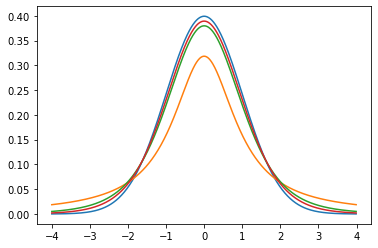

In [131]:
X = stats.norm(0, 1)
T1 = stats.t(df=1)
T5 = stats.t(df=5)
T10 = stats.t(df=10)

x = np.arange(-4, 4, 0.01)

plt.plot(x, X.pdf(x))
plt.plot(x, T1.pdf(x))
plt.plot(x, T5.pdf(x))
plt.plot(x, T10.pdf(x))
plt.show()

#### Własność 

Jeśli $X_1, X_2, ..., X_n \sim N(\mu, \sigma^2)$, to 

$$\sqrt{n}\frac{\bar X - \mu}{s^2} \sim t_{n-1}.$$

#### Zadanie (rozkład t-studenta)

Dla $n = 100$ obserwacji wygeneruj $100$ próbek z rozkładu normalnego standardowego. 

 - Następnie policz dla każdej próbki $$t_{probka} = \sqrt{n}\frac{\bar x - \mu}{s^2} \sim t_{n-1}.$$
 - Dla każdej próbki policz $p_{probka} = 2P(T > |t_{probka}|)$.
 - Narysuj histogram. Jaki to rozkład przypomina?

### Rozkład wykładniczy

Rozkład wykładniczy ma gęstość:

$$
f_{X}(x) = 
\left\{ \begin{array}{ll}
\lambda e^{-\lambda x} & \textrm{gdy $x \geq 0$}\\
0 & \textrm{gdy $x < 0$}
\end{array} \right. ,
$$

gdzie $\lambda> 0$ jest parametrem skali.

#### Zadanie (wykładniczy)

Wygeneruj próbkę $n=100$ elementową dla $\lambda=1/3, 3$. Narysuj estymatory gęstości (`sns.kdeplot`). Policz skośność dla każdej próbki `stats.skew()`.

#### Centralne Twierdzenie Graniczne (Lindeberga-Levy'ego)
Niech $X_1, X_2, \ldots , X_n$ będą niezależnymi zmiennymi losowymi o tym samym rozkładzie (prosta próba losowa), wartości średniej $\mu = EX$ i wariancji $0<\sigma^2 = D^2 X < \infty$. 

Wtedy:

$$
\lim_{n \to \infty} P\left(\sqrt{n}\frac{\bar X - \mu}{ \sigma } < x \right) = \Phi(x),
$$

gdzie $\Phi$ oznacza dystrybuantę standardowego rozkładu normalnego ($N(0,1)$). 

#### Przykład

Prawdopodobie«stwo uzyskania wygranej w pewnej grze losowej wynosi 0.1. Obliczyć prawdopodobieństwo, że spośród 500 grających osób wygra więcej niż 60 osób.

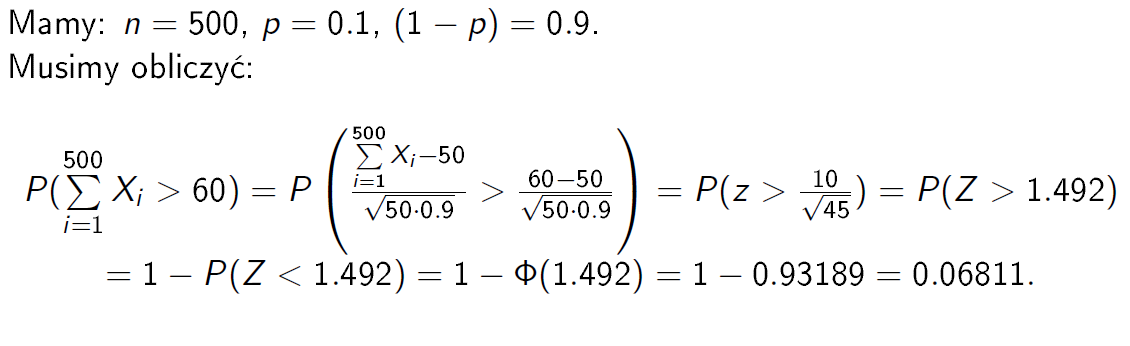

#### Zadanie  (CTG)

Dla
 - rozkładu wykładniczego z parametrem $\lambda=3$ 
 - rozkładu t-Studenta z 10 stopniami swobody
wygeneruj próbkę $n=1000$ obserwacji i policz:

$$T = \sqrt{n} \frac{\bar X- \mathbb{E}X}{Var(X)}$$

Wykonaj polecenie 100 razy, tak, aby dostać 100 wartości $T$. Narysuj histogram i nanieś gęstość $N(0, 1)$.

(PD) Sprawdź, co się stanie, jeśli zwiększymy/zmniejszymy $n$.

### Rozkład F-Snedecora

Rozkład F-Snedecora ma gęstość:

$$
{\begin{aligned}f_{X}(x;d_{1},d_{2})&={\frac  {{\sqrt  {{\frac  {(d_{1}\,x)^{{d_{1}}}\,\,d_{2}^{{d_{2}}}}{(d_{1}\,x+d_{2})^{{d_{1}+d_{2}}}}}}}}{x\,{\mathrm  {B}}\!\left({\frac  {d_{1}}{2}},{\frac  {d_{2}}{2}}\right)}}={\frac  {1}{{\mathrm  {B}}\!\left({\frac  {d_{1}}{2}},{\frac  {d_{2}}{2}}\right)}}\left({\frac  {d_{1}}{d_{2}}}\right)^{{{\frac  {d_{1}}{2}}}}x^{{{\frac  {d_{1}}{2}}-1}}\left(1+{\frac  {d_{1}}{d_{2}}}\,x\right)^{{-{\frac  {d_{1}+d_{2}}{2}}}}\end{aligned}},
\mbox{   dla } x \geq 0
$$

Jeżeli $(X_1,\ldots,X_n)$ jest próbką prostą z rozkładu $N(\mu_1,\sigma_1^2)$, a $(Y_1,\ldots,Y_m)$ jest niezależną próbką prostą z rozkładu $N(\mu_2,\sigma_2^2)$ to zmienna losowa
$$
F=\frac{ \frac{1}{n-1}  \sum_{i=1}^{n} (X_i - \bar X)^2 }{\frac{1}{m-1}  \sum_{i=1}^{m} (X_i - \bar X)^2 }
$$
gdzie
$$
\bar X = \frac{1}{n} \sum_{i=1}^{n} X_i, \quad \bar Y = \frac{1}{m} \sum_{i=1}^{m} Y_i
$$
ma rozkład $F(m-1,n-1)$ (F-Snedecora).

#### Zadanie 

Weźmy na przykład przypadek, w którym chcemy porównać dokładność dwóch metod. Chcemy określić, czy dokładność obu metod jest równoważna, czy też jedna metoda jest lepsza.

Mamy następujące wyniki:
Próbka 1: 

$[20.7, 20.3, 20.3, 20.3, 20.7, 19.9, 19.9, 19.9, 20.3, 20.3, 19.7, 20.3]$

Próbka 2: 

$[19.7, 19.4, 20.1, 18.6, 18.8, 20.2, 18.7, 19.0]$

### Rozkład Weibulla

Rozkład Weibulla jest najczęściej stosowany do analizy przeżycia. 

Rozkład Weibulla  ma gęstość:
$$
f_{X}(x;k,\lambda) = 
\left\{ \begin{array}{ll}
\frac{k}{\lambda} \left( \frac{k}{\lambda} \right)^{k-1} e^{-(x/\lambda)^k} & \textrm{gdy $x \geq 0$}\\
0 & \textrm{gdy $x < 0$}
\end{array} \right. ,
$$
gdzie $k>0$ jest parametrem kształtu oraz $\lambda> 0$ jest parametrem skali.